<a href="https://colab.research.google.com/github/ParkJinWu/Assignment/blob/main/%EB%B9%85%EB%8D%B0%ED%94%84%EC%A0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __빅데이터개론 기말프로젝트__

* InClass Prediction Competition 주소 :
  https://www.kaggle.com/t/b0dad38443624414a46ce6df520a26bc


1. 기간 : 2020년 11월 30일[월요일] ~ 12월 16일[수요일] - 기간 외 제출 받지않음.
2. 개인 프로젝트(팀별 프로젝트 아님!!) - copy & paste 발견시 0점 처리
3. 주어진 데이터에 대한 분류 모델 생성 및 성능평가(kaggle submissions)
  * Logistic Regression, Decision Trees, Random Forests, Support Vector Machine
  * 4개의 분류 모델을 사용하여 Train set으로 학습, Test set으로 예측/분류를 진행하여 Kaggle에 submissions
  * 4개의 분류 모델을 모두 사용해야 하며, 자신이 작업했던 내용을 Jupyter notebook(Jupyter, Google Colab) 또는 Rcript에 저장할 것.
  * 또한, 모든 작업을 진행할 때는 필요한 부분에 주석을 반드시 작성할 것*(주석 미기입시 0점 처리)*

```
# Random Forest 또는 SVM predict에서 에러가 발생할 때 아래의 코드 사용
# https://stackoverflow.com/questions/24829674/r-random-forest-error-type-of-predictors-in-new-data-do-not-match
common <- intersect(names(train), names(test)) 
for (p in common) { 
  if (class(train[[p]]) == "factor") { 
    levels(test[[p]]) <- levels(train[[p]]) 
  } 
}
```


## 1. **Logistic Regression**

In [ ]:
install.packages(c("tidyverse", "data.table", "caret", "e1071", "randomForest")) #install을 통해 설치한다.
library(tidyverse) #library를 통해서 r로 불러온다.
library(data.table)
options(repr.plot.width=10, repr.plot.height=10)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [ ]:
LR_DF <- fread("/content/Train.csv", sep = ",") %>% as_tibble() #fread를 통해서 준비된 train데이터를 불러온다.

LR_DF %>% str() #str()로 데이터를 확인해준다.

tibble [10,098 × 22] (S3: tbl_df/tbl/data.frame)
 $ ID            : chr [1:10098] "T1" "T2" "T3" "T4" ...
 $ age           : int [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : chr [1:10098] "technician" "retired" "technician" "management" ...
 $ marital       : chr [1:10098] "single" "single" "married" "married" ...
 $ education     : chr [1:10098] "university.degree" "high.school" "professional.course" "university.degree" ...
 $ default       : chr [1:10098] "no" "no" "unknown" "no" ...
 $ housing       : chr [1:10098] "no" "no" "yes" "no" ...
 $ loan          : chr [1:10098] "no" "no" "no" "no" ...
 $ contact       : chr [1:10098] "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr [1:10098] "nov" "jun" "jul" "nov" ...
 $ day_of_week   : chr [1:10098] "fri" "fri" "wed" "mon" ...
 $ duration      : int [1:10098] 903 74 75 59 252 659 21 2462 266 205 ...
 $ campaign      : int [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ pdays         : int [1:10098] 999 999 

In [ ]:
LR_DF %>% summary() #summary를 통해서 데이터의 최소,최대값을 확인해주고, 결측(NA)값을 확인한다. 이 데이터에서는 결측값은 없다.

      ID                 age           job              marital         
 Length:10098       Min.   :17.0   Length:10098       Length:10098      
 Class :character   1st Qu.:32.0   Class :character   Class :character  
 Mode  :character   Median :38.0   Mode  :character   Mode  :character  
                    Mean   :40.3                                        
                    3rd Qu.:48.0                                        
                    Max.   :98.0                                        
  education           default            housing              loan          
 Length:10098       Length:10098       Length:10098       Length:10098      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

**◆ unique()로 범주형 변수인지 확인을 한다. 확인 한 결과 범주형데이터는 총 14개다.**

In [ ]:
LR_DF$ID %>% unique() #범주형 변수가 아님

In [ ]:
LR_DF$job %>% unique() #unique()를 통해서 범주형 데이터인지 확인.

In [ ]:
LR_DF$marital %>% unique()

In [ ]:
LR_DF$education %>% unique()

In [ ]:
LR_DF$default %>% unique()

In [ ]:
LR_DF$housing %>% unique()

In [ ]:
LR_DF$loan %>% unique()

In [ ]:
LR_DF$contact %>% unique()

In [ ]:
LR_DF$month %>% unique()

In [ ]:
LR_DF$day_of_week %>% unique()

In [ ]:
LR_DF$pdays %>% unique()

In [ ]:
LR_DF$previous %>% unique()

In [ ]:
LR_DF$poutcome %>% unique()

In [ ]:
LR_DF$termDeposit %>% unique()

In [ ]:
LR_DF$campaign %>% unique()

**◆ mutate를 이용해서 범주형 데이터로 바꿔준다.**

In [ ]:
LR_DF <- LR_DF  %>%  mutate_at(c("job", "marital", "education", "default", "housing", "loan", "contact",
"month","day_of_week","poutcome","termDeposit"), `.funs` = as.factor)
LR_DF %>% str()

summary(LR_DF)

tibble [10,098 × 22] (S3: tbl_df/tbl/data.frame)
 $ ID            : chr [1:10098] "T1" "T2" "T3" "T4" ...
 $ age           : int [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 10 6 10 5 2 6 10 3 3 5 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 3 3 2 2 2 2 2 2 2 2 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 7 4 6 7 1 8 6 7 7 7 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 1 2 1 2 1 2 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 3 1 3 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 1 1 2 2 2 1 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 8 5 4 8 7 6 5 8 1 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 2 2 2 2 2 3 5 ...
 $ duration      : int [1:10098] 903 74 75 59 252 659 21 2462

      ID                 age                job           marital    
 Length:10098       Min.   :17.0   admin.     :2676   divorced:1076  
 Class :character   1st Qu.:32.0   blue-collar:1973   married :5910  
 Mode  :character   Median :38.0   technician :1612   single  :3090  
                    Mean   :40.3   services   : 863   unknown :  22  
                    3rd Qu.:48.0   management : 723                  
                    Max.   :98.0   retired    : 618                  
                                   (Other)    :1633                  
               education       default        housing          loan     
 university.degree  :3184   no     :8391   no     :4520   no     :8326  
 high.school        :2271   unknown:1706   unknown: 252   unknown: 252  
 basic.9y           :1373   yes    :   1   yes    :5326   yes    :1520  
 professional.course:1315                                               
 basic.4y           : 978                                               
 b

**◆ 데이터를 train과 test로 분리.**

In [ ]:
library(caret) #library를 통해서 caret을 r로 불러온다.
#createDataPartition을 이용해서 split해준다. 이 때 y에는 반응변수를 넣었고, 비율은 7:3으로 나누었다.
index <- createDataPartition(y=LR_DF$termDeposit, p=0.7, list =FALSE)
head(index, 30) #head를 통해 분리된 데이터의 상위 30개를 본다.

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




Resample1
1
2
3
4
5
6
7
8
9
12


In [ ]:
train <- LR_DF[index, ]
test <- LR_DF[-index, ]

train %>% show()
test %>% show()

Warning message:
“The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


# A tibble: 7,070 x 22
   ID      age job   marital education default housing loan  contact month
   <chr> <int> <fct> <fct>   <fct>     <fct>   <fct>   <fct> <fct>   <fct>
 1 T1       41 tech… single  universi… no      no      no    cellul… nov  
 2 T2       57 reti… single  high.sch… no      no      no    teleph… jun  
 3 T3       34 tech… married professi… unknown yes     no    cellul… jul  
 4 T4       54 mana… married universi… no      no      no    cellul… nov  
 5 T5       49 blue… married basic.4y  unknown no      no    teleph… may  
 6 T6       73 reti… married unknown   no      yes     no    teleph… mar  
 7 T7       40 tech… married professi… unknown no      no    teleph… jun  
 8 T8       34 entr… married universi… unknown yes     no    cellul… nov  
 9 T9       56 entr… married universi… no      yes     no    cellul… apr  
10 T12      37 admi… married high.sch… no      unknown unkn… cellul… nov  
# … with 7,060 more rows, and 12 more variables: day_of_week <fct>,
#   durat

**◆ train set을 이용해서 glm모델 생성**

In [ ]:
LR <- glm(termDeposit ~ ., data = train, family ="binomial" )
summary(LR)

In [ ]:
LR2 <- step(LR, direction = "backward" ,trace = F)

ERROR: ignored

In [ ]:
summary(LR2)


Call:
glm(formula = termDeposit ~ education + default + contact + month + 
    day_of_week + duration + campaign + pdays + previous + emp.var.rate + 
    cons.price.idx + euribor3m + nr.employed, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.3410  -0.3944  -0.1978   0.4608   2.8595  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -2.889e+02  5.263e+01  -5.489 4.04e-08 ***
educationbasic.6y            -9.592e-02  2.164e-01  -0.443 0.657632    
educationbasic.9y             9.946e-03  1.659e-01   0.060 0.952195    
educationhigh.school          9.938e-02  1.517e-01   0.655 0.512297    
educationilliterate           2.103e+00  1.261e+00   1.668 0.095316 .  
educationprofessional.course  1.315e-01  1.667e-01   0.789 0.430249    
educationuniversity.degree    3.278e-01  1.449e-01   2.262 0.023720 *  
educationunknown              3.277e-01  2.158e-01   1.518

**◆ 예측**

In [ ]:
#test %>% show()

In [ ]:
#예측을 할 때 type을 resopnse로 사용해야 확률이 나온다. 사용하지 않으면 값으로 나오게 된다.
predict_value <- predict(LR2 ,test, type ="response") %>% tibble(predict_value = .)
predict_value %>% show()

# A tibble: 3,028 x 1
   predict_value
           <dbl>
 1       0.878  
 2       0.0212 
 3       0.0211 
 4       0.386  
 5       0.936  
 6       0.00983
 7       0.0561 
 8       0.0306 
 9       0.0589 
10       0.0400 
# … with 3,018 more rows


In [ ]:
predict_check <- test %>% select(termDeposit) %>% dplyr::bind_cols(., predict_value)
predict_check %>% show()

ERROR: ignored

**◆ cut-off value 설정**
 - predict_value > 0.5 == termDeposit :1 (정기예금 한다.)
 - predict_vlaue <= 0.5 == termDeposit :0
 (정기예금 하지 않는다.)

In [ ]:
#predict_cutoff에 mutate를 이용해서 정기예금의 여부를 factor형으로 만들어 새로운 열에 추가한다.
predict_cutoff <- predict_check %>% mutate(predict_value_cutoff = as.factor(ifelse(predict_value > 0.5, "yes", "no")))
predict_cutoff %>% show()

# A tibble: 3,028 x 3
   termDeposit predict_value predict_value_cutoff
   <fct>               <dbl> <fct>               
 1 no                0.878   yes                 
 2 no                0.0212  no                  
 3 no                0.0211  no                  
 4 no                0.386   no                  
 5 yes               0.936   yes                 
 6 no                0.00983 no                  
 7 no                0.0561  no                  
 8 no                0.0306  no                  
 9 no                0.0589  no                  
10 no                0.0400  no                  
# … with 3,018 more rows


In [ ]:
#정답과 내가 예측한 값을 전달해준다.
caret::confusionMatrix(predict_cutoff$termDeposit, predict_cutoff$predict_value_cutoff)

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1554  222
       yes  236 1016
                                          
               Accuracy : 0.8487          
                 95% CI : (0.8355, 0.8613)
    No Information Rate : 0.5911          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6876          
                                          
 Mcnemar's Test P-Value : 0.5436          
                                          
            Sensitivity : 0.8682          
            Specificity : 0.8207          
         Pos Pred Value : 0.8750          
         Neg Pred Value : 0.8115          
             Prevalence : 0.5911          
         Detection Rate : 0.5132          
   Detection Prevalence : 0.5865          
      Balanced Accuracy : 0.8444          
                                          
       'Positive' Class : no              
                        

**◆ cut-off-value값에 따라서 결과가 달라지기 때문에 최적의 cut-off-value를 찾아서 test해야한다.**

In [ ]:
#최적의 cut-off-value를 찾기 위해서 ROC curve와 AUC를 구한다.
install.packages("pROC") #pROC를 install해준다.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("pROC") #library를 이용해서 r로 불러온다.

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Setting levels: control = no, case = yes

Setting direction: controls < cases



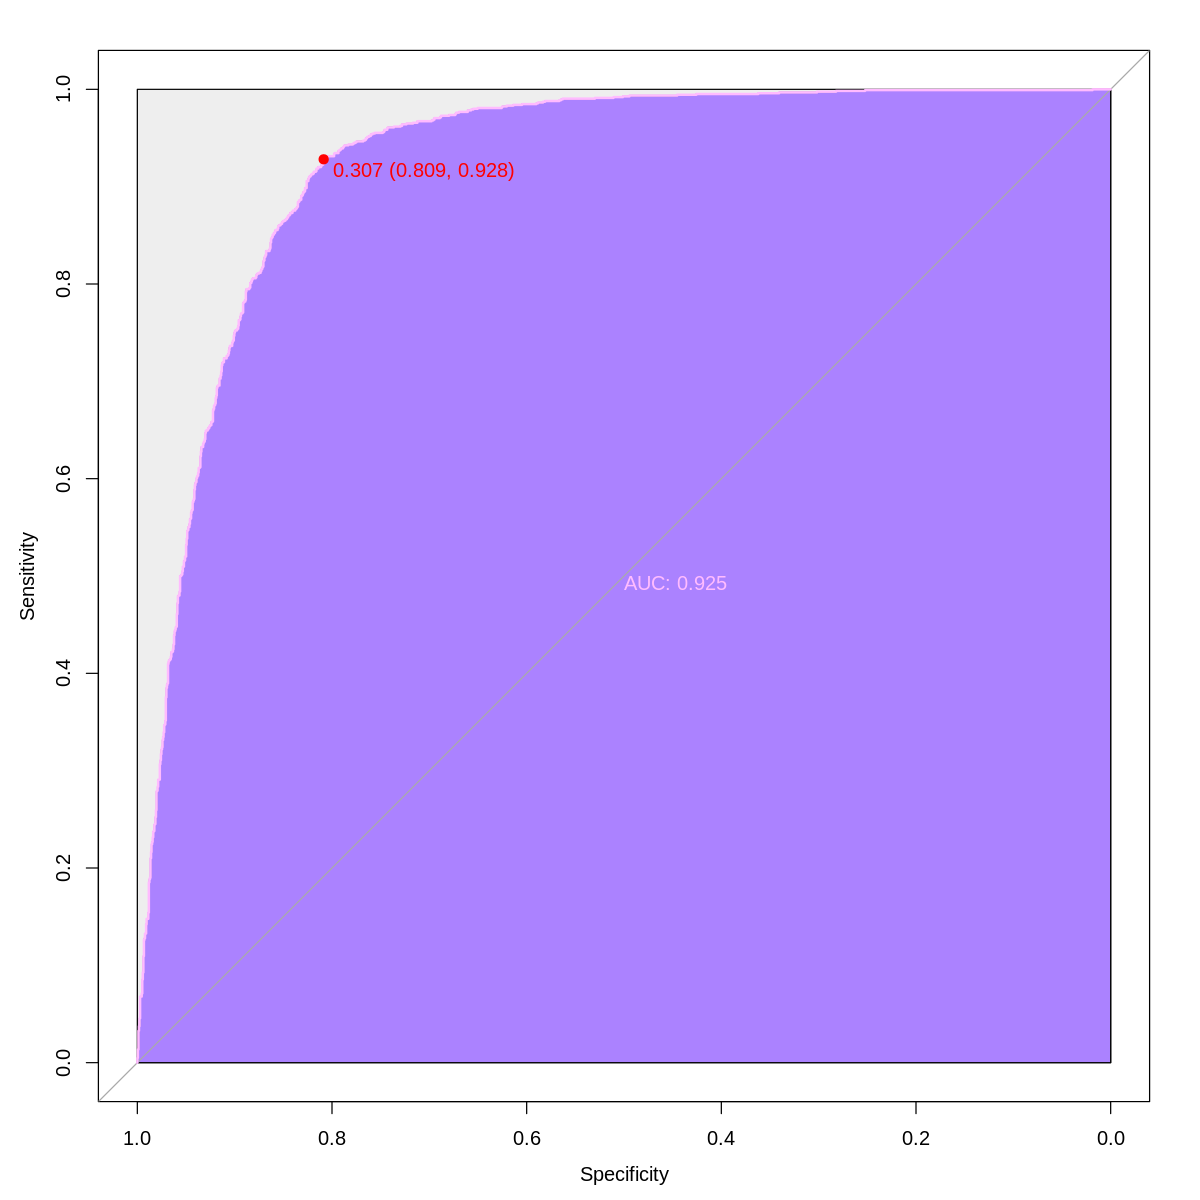

In [ ]:
roc_c <- roc(predict_cutoff$termDeposit, predict_cutoff$predict_value)# roc(정답 , 예측 값)

#plot.roc(value,그래프 선의 색상, auc 값 출력 여부, auc의 최대 면적 출력 여부, 기준치에 대한 출력여부, 기준치 포인트, 기준치 색상)
#(그래프 선 아래의 출력여부,색상)
plot.roc(roc_c,   
        col="plum1",  
        print.auc=TRUE, 
        max.auc.polygon=TRUE,   
        print.thres=TRUE, print.thres.pch=19, print.thres.col = "red",
        auc.polygon=TRUE, auc.polygon.col="mediumpurple1")


In [ ]:
pROC::coords(roc_c, "best", ret = "threshold", transpose = F) #최적의 cut-off-value를 출력한다.
predict_check <- test %>% select(termDeposit) %>% dplyr::bind_cols(., predict_value)

threshold
<dbl>
0.3072444


** ◆ train으로 모델링한 모델을 test.csv 데이터에의 모델을 적용하여 예측 **

In [ ]:
LR_kaggle <- fread("/content/Test.csv", sep =",") %>% as_tibble()
LR_kaggle %>% summary()
str(LR_kaggle)

      ID                 age            job              marital         
 Length:1121        Min.   :18.00   Length:1121        Length:1121       
 Class :character   1st Qu.:32.00   Class :character   Class :character  
 Mode  :character   Median :38.00   Mode  :character   Mode  :character  
                    Mean   :40.48                                        
                    3rd Qu.:48.00                                        
                    Max.   :98.00                                        
  education           default            housing              loan          
 Length:1121        Length:1121        Length:1121        Length:1121       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

tibble [1,121 × 21] (S3: tbl_df/tbl/data.frame)
 $ ID            : chr [1:1121] "T1" "T2" "T3" "T4" ...
 $ age           : int [1:1121] 35 36 38 33 36 50 29 35 28 45 ...
 $ job           : chr [1:1121] "housemaid" "blue-collar" "technician" "admin." ...
 $ marital       : chr [1:1121] "married" "married" "divorced" "married" ...
 $ education     : chr [1:1121] "basic.4y" "unknown" "high.school" "high.school" ...
 $ default       : chr [1:1121] "no" "no" "no" "no" ...
 $ housing       : chr [1:1121] "no" "no" "no" "no" ...
 $ loan          : chr [1:1121] "no" "no" "no" "no" ...
 $ contact       : chr [1:1121] "telephone" "cellular" "telephone" "cellular" ...
 $ month         : chr [1:1121] "may" "apr" "apr" "aug" ...
 $ day_of_week   : chr [1:1121] "thu" "fri" "fri" "fri" ...
 $ duration      : int [1:1121] 646 231 320 207 183 705 1101 236 78 61 ...
 $ campaign      : int [1:1121] 3 2 3 3 1 1 1 1 3 4 ...
 $ pdays         : int [1:1121] 999 999 6 15 999 999 999 999 999 999 ...
 $ previou

**제출할 Test.csv의 일부 데이터를 범주형 변수로 바꿔준다.**

In [ ]:
LR_kaggle <- LR_kaggle  %>%  mutate_at(c("job", "marital", "education", "default", "housing", "loan", "contact",
"month","day_of_week","poutcome"), `.funs` = as.factor)
LR_kaggle %>% str()

tibble [1,121 × 21] (S3: tbl_df/tbl/data.frame)
 $ ID            : chr [1:1121] "T1" "T2" "T3" "T4" ...
 $ age           : int [1:1121] 35 36 38 33 36 50 29 35 28 45 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 2 10 1 1 10 2 1 10 12 ...
 $ marital       : Factor w/ 3 levels "divorced","married",..: 2 2 1 2 2 2 2 2 3 2 ...
 $ education     : Factor w/ 7 levels "basic.4y","basic.6y",..: 1 7 4 4 2 3 3 4 5 7 ...
 $ default       : Factor w/ 2 levels "no","unknown": 1 1 1 1 1 1 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 3 3 1 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 3 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 1 2 1 1 1 1 2 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 1 1 2 8 8 7 7 2 5 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 3 1 1 1 1 1 5 4 3 1 ...
 $ duration      : int [1:1121] 646 231 320 207 183 705 1101 236 7

**◆ test.csv predict**

In [ ]:
#찾은 최적의 cut-off-value를 이용해서 예측한다.
predict_value <- predict(LR2, LR_kaggle, type = "response") %>% tibble(termDeposit = .)
predict_cutoff <- LR_kaggle %>% select(ID) %>% dplyr::bind_cols(., predict_value) %>%
mutate(termDeposit = ifelse(termDeposit >=0.2887846  , "yes", "no"))

predict_cutoff %>% show() #확인

# A tibble: 1,121 x 2
   ID    termDeposit
   <chr> <chr>      
 1 T1    no         
 2 T2    yes        
 3 T3    yes        
 4 T4    yes        
 5 T5    no         
 6 T6    yes        
 7 T7    yes        
 8 T8    no         
 9 T9    yes        
10 T10   no         
# … with 1,111 more rows


**◆ 예측된 데이터를 sample_submmision.csv의 형태로 저장한다.**

In [ ]:
install.packages("readr")
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#@title

predict_cutoff %>% write_csv(path = "20165132_Logic_submmision.csv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“The `path` argument of `write_csv()` is deprecated as of readr 1.4.0.
Please use the `file` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


## 2. **Decision Trees[Bagging]**

**train 데이터 및 rpart를 이용한 의사결정트리(Decision Tree) 모델 생성**

In [ ]:
DT_DF <-  read_csv("/content/Train.csv")
#fread사용 할 때는 tibble로 바꿔줘야하는데 read_csv쓰면 불러올 때 tibble이여서 바꿔줄 필요 X 

str(DT_DF) #str()로 데이터를 확인해준다.




── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  emp.var.rate = col_double(),
  cons.price.idx = col_double(),
  cons.conf.idx = col_double(),
  euribor3m = col_double(),
  nr.employed = col_double()
)
ℹ Use `spec()` for the full column specifications.




tibble [10,098 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID            : chr [1:10098] "T1" "T2" "T3" "T4" ...
 $ age           : num [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : chr [1:10098] "technician" "retired" "technician" "management" ...
 $ marital       : chr [1:10098] "single" "single" "married" "married" ...
 $ education     : chr [1:10098] "university.degree" "high.school" "professional.course" "university.degree" ...
 $ default       : chr [1:10098] "no" "no" "unknown" "no" ...
 $ housing       : chr [1:10098] "no" "no" "yes" "no" ...
 $ loan          : chr [1:10098] "no" "no" "no" "no" ...
 $ contact       : chr [1:10098] "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr [1:10098] "nov" "jun" "jul" "nov" ...
 $ day_of_week   : chr [1:10098] "fri" "fri" "wed" "mon" ...
 $ duration      : num [1:10098] 903 74 75 59 252 ...
 $ campaign      : num [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ pdays         : num [1:10098] 999 999 999 999 

In [ ]:
DT_DF %>% summary()

In [ ]:
DT_DF <- DT_DF %>% select(-ID)%>%  mutate_at( c("job", "marital", "education", "default", "housing", "loan", "contact",
"month","day_of_week","poutcome","termDeposit"), `.funs` = as.factor)
DT_DF %>% str()




tibble [10,098 × 21] (S3: tbl_df/tbl/data.frame)
 $ age           : num [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 10 6 10 5 2 6 10 3 3 5 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 3 3 2 2 2 2 2 2 2 2 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 7 4 6 7 1 8 6 7 7 7 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 1 2 1 2 1 2 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 3 1 3 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 1 1 2 2 2 1 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 8 5 4 8 7 6 5 8 1 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 2 2 2 2 2 3 5 ...
 $ duration      : num [1:10098] 903 74 75 59 252 ...
 $ campaign      : num [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ pday

In [ ]:
library(caret) 
index <- createDataPartition(y=DT_DF$termDeposit, p=0.7, list =FALSE)

In [ ]:
DTtrain <- DT_DF[index, ]
DTtest <- DT_DF[-index, ]

DTtrain %>% show()
DTtest %>% show()

# A tibble: 7,070 x 21
     age job   marital education default housing loan  contact month day_of_week
   <dbl> <fct> <fct>   <fct>     <fct>   <fct>   <fct> <fct>   <fct> <fct>      
 1    41 tech… single  universi… no      no      no    cellul… nov   fri        
 2    57 reti… single  high.sch… no      no      no    teleph… jun   fri        
 3    34 tech… married professi… unknown yes     no    cellul… jul   wed        
 4    73 reti… married unknown   no      yes     no    teleph… mar   mon        
 5    34 entr… married universi… unknown yes     no    cellul… nov   mon        
 6    41 mana… married universi… no      yes     no    teleph… may   wed        
 7    37 admi… married high.sch… no      unknown unkn… cellul… nov   thu        
 8    41 mana… married high.sch… unknown yes     no    cellul… may   tue        
 9    55 tech… married universi… no      yes     yes   cellul… may   thu        
10    40 blue… married basic.9y  no      no      no    cellul… apr   thu        
# … w

In [ ]:
install.packages("rpart")
library(rpart)
termDeposit_detection <- rpart(formula = termDeposit ~. , data =DTtrain, method ="class" )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
summary(termDeposit_detection) #나온 데이터를 가지고 가지치기를 한다.

Call:
rpart(formula = termDeposit ~ ., data = DTtrain, method = "class")
  n= 7070 

          CP nsplit rel error    xerror       xstd
1 0.36183311      0 1.0000000 1.0000000 0.01416173
2 0.25615595      1 0.6381669 0.6723666 0.01288428
3 0.01983584      2 0.3820109 0.3912449 0.01059026
4 0.01778386      3 0.3621751 0.3751710 0.01041148
5 0.01128591      4 0.3443912 0.3652531 0.01029785
6 0.01025992      5 0.3331053 0.3491792 0.01010805
7 0.01000000      6 0.3228454 0.3484952 0.01009982

Variable importance
      duration    nr.employed      euribor3m  cons.conf.idx   emp.var.rate 
            24             17             15             14              9 
cons.price.idx          month          pdays            job 
             8              5              5              1 

Node number 1: 7070 observations,    complexity param=0.3618331
  predicted class=no   expected loss=0.4135785  P(node) =1
    class counts:  4146  2924
   probabilities: 0.586 0.414 
  left son=2 (5386 obs) rig

In [ ]:
#plot을 이용해 시각적으로 확인
#plot(termDeposit_detection)
#text(termDeposit_detection)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



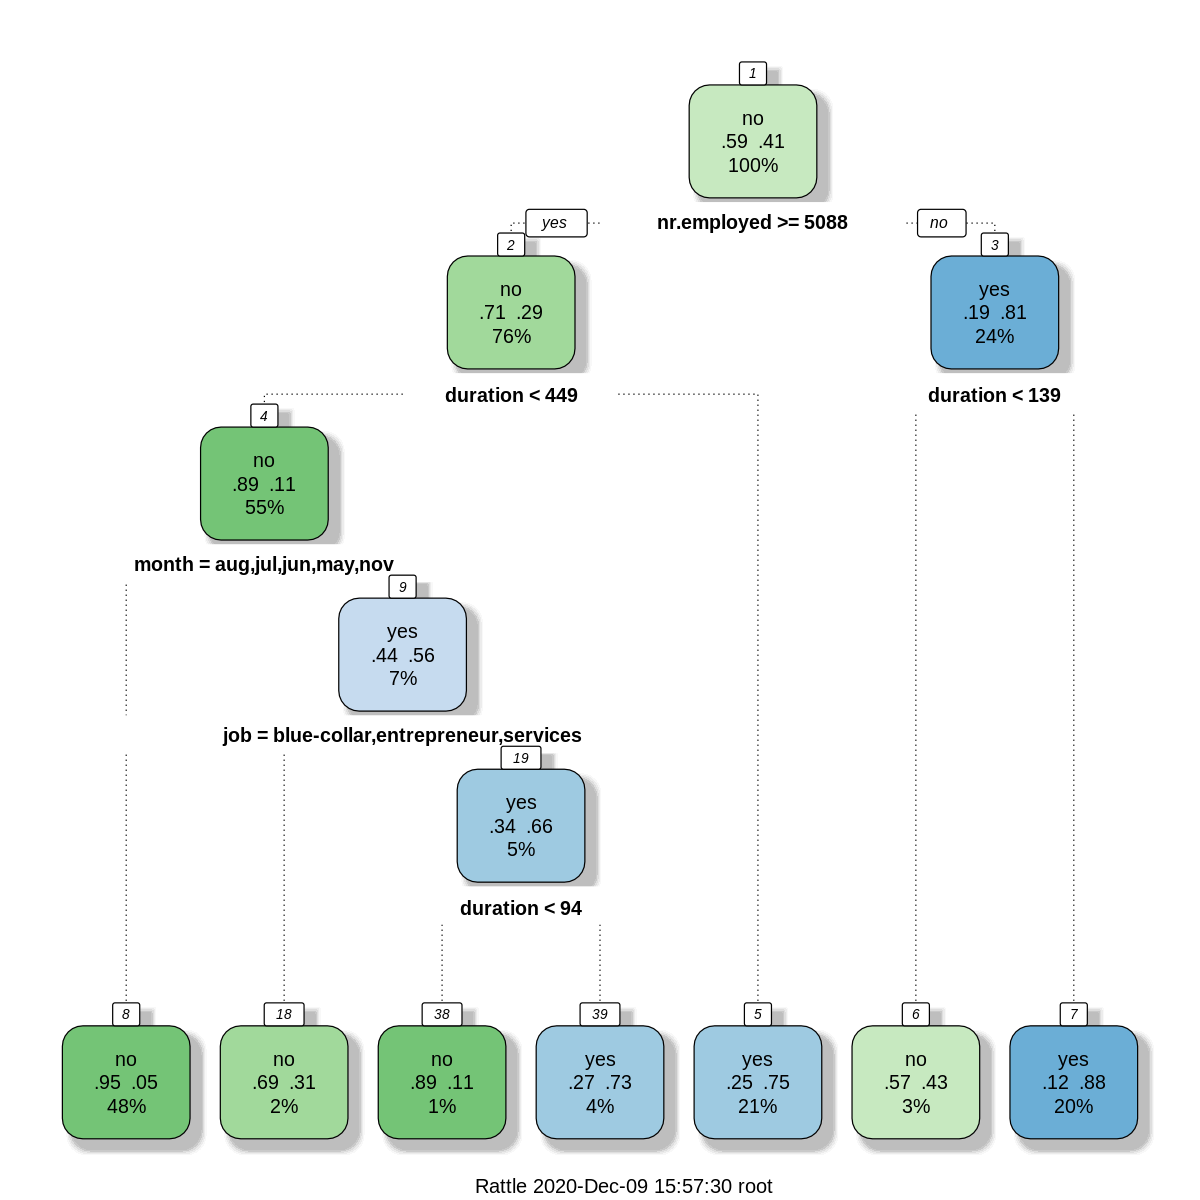

In [ ]:
install.packages(c("rattle","rpart.plot"))

library(rattle)
library(rpart.plot)
library(RColorBrewer)
#node를 봐서 시각적으로 확인한다.
#노드의 성질,순도,전체에서 차지하는 비율을 보여준다.
fancyRpartPlot(termDeposit_detection)

**가지치기(pruning)을 통한 최적화진행**


Classification tree:
rpart(formula = termDeposit ~ ., data = DTtrain, method = "class")

Variables actually used in tree construction:
[1] duration    job         month       nr.employed

Root node error: 2924/7070 = 0.41358

n= 7070 

        CP nsplit rel error  xerror     xstd
1 0.361833      0   1.00000 1.00000 0.014162
2 0.256156      1   0.63817 0.67237 0.012884
3 0.019836      2   0.38201 0.39124 0.010590
4 0.017784      3   0.36218 0.37517 0.010411
5 0.011286      4   0.34439 0.36525 0.010298
6 0.010260      5   0.33311 0.34918 0.010108
7 0.010000      6   0.32285 0.34850 0.010100


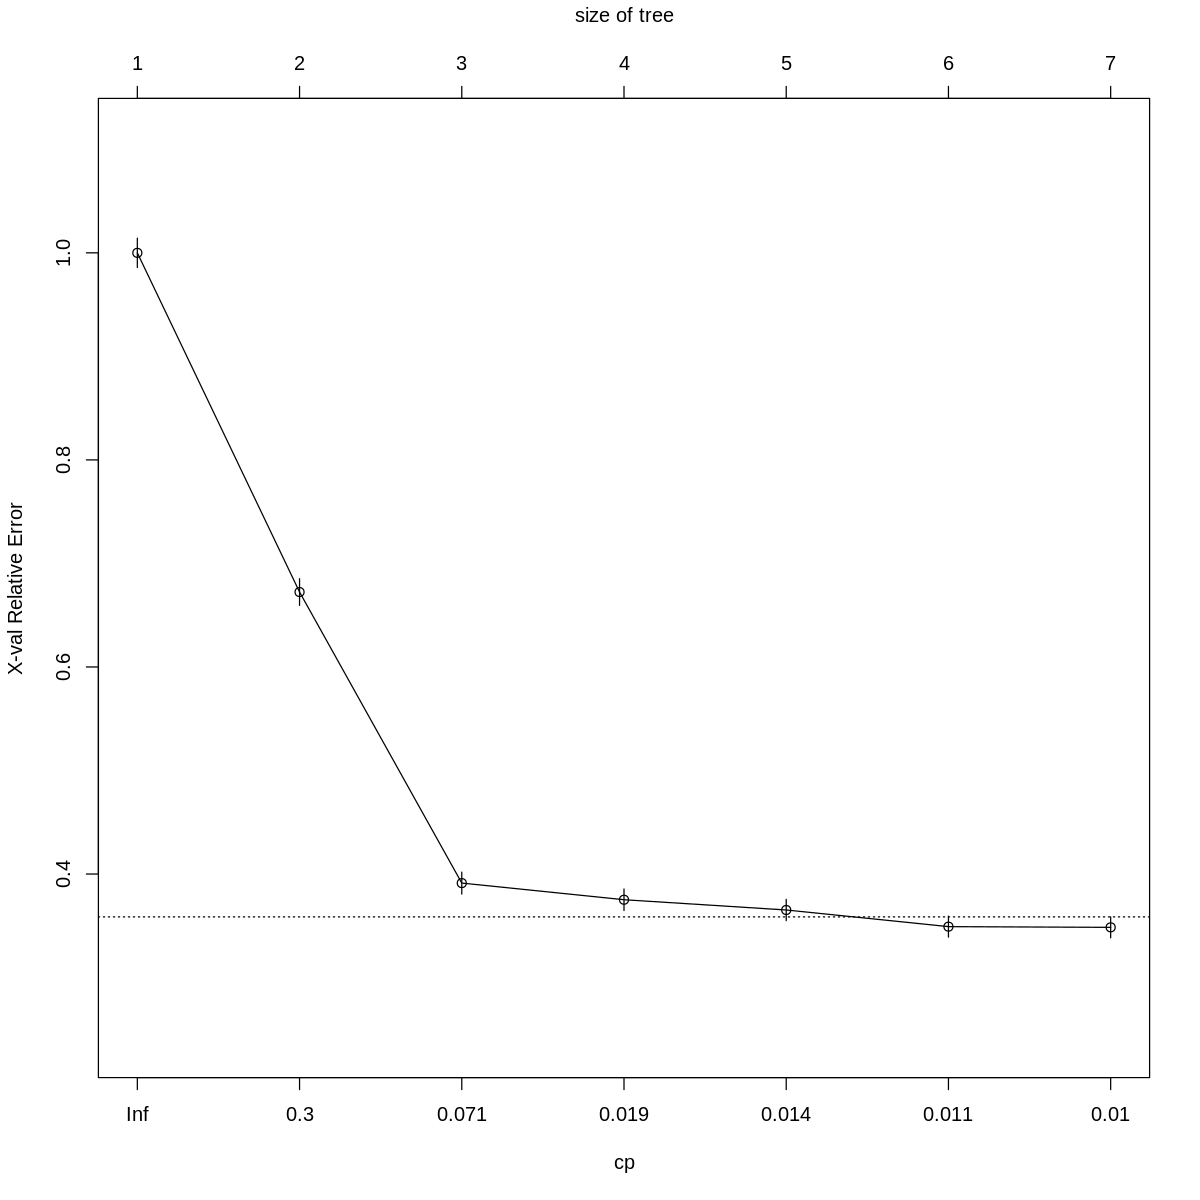

In [ ]:
#printcp를 이용해 값을 추출한다
#y축이 최소가 되는 부분의 값을 고른다. 즉 xerror가 최소가 되는 CP를 선택
rpart::printcp(termDeposit_detection)

plotcp(termDeposit_detection)

In [ ]:
termDeposit_detection$cptable %>% as_tibble() %>% filter(xerror == min(xerror))
min_xerror_cp <-termDeposit_detection$cptable  %>% as_tibble()%>% filter(xerror == min(xerror))%>% pull(CP)
#dplyr 의 filter 함수를 이용해서 최소가 되는 cp를 선택한다. 
#cptable을 통해 CPtable을 가져오고 이 테이블 내에서 데이터 타입을 matrix에서 df로 바꿔줘야 한다(tibble로)
#pull을 이용해서 CP값만 빼온다.

min_xerror_cp #최소가 되는 cp확인

CP,nsplit,rel error,xerror,xstd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,6,0.3228454,0.3484952,0.01009982


[1] 0.01

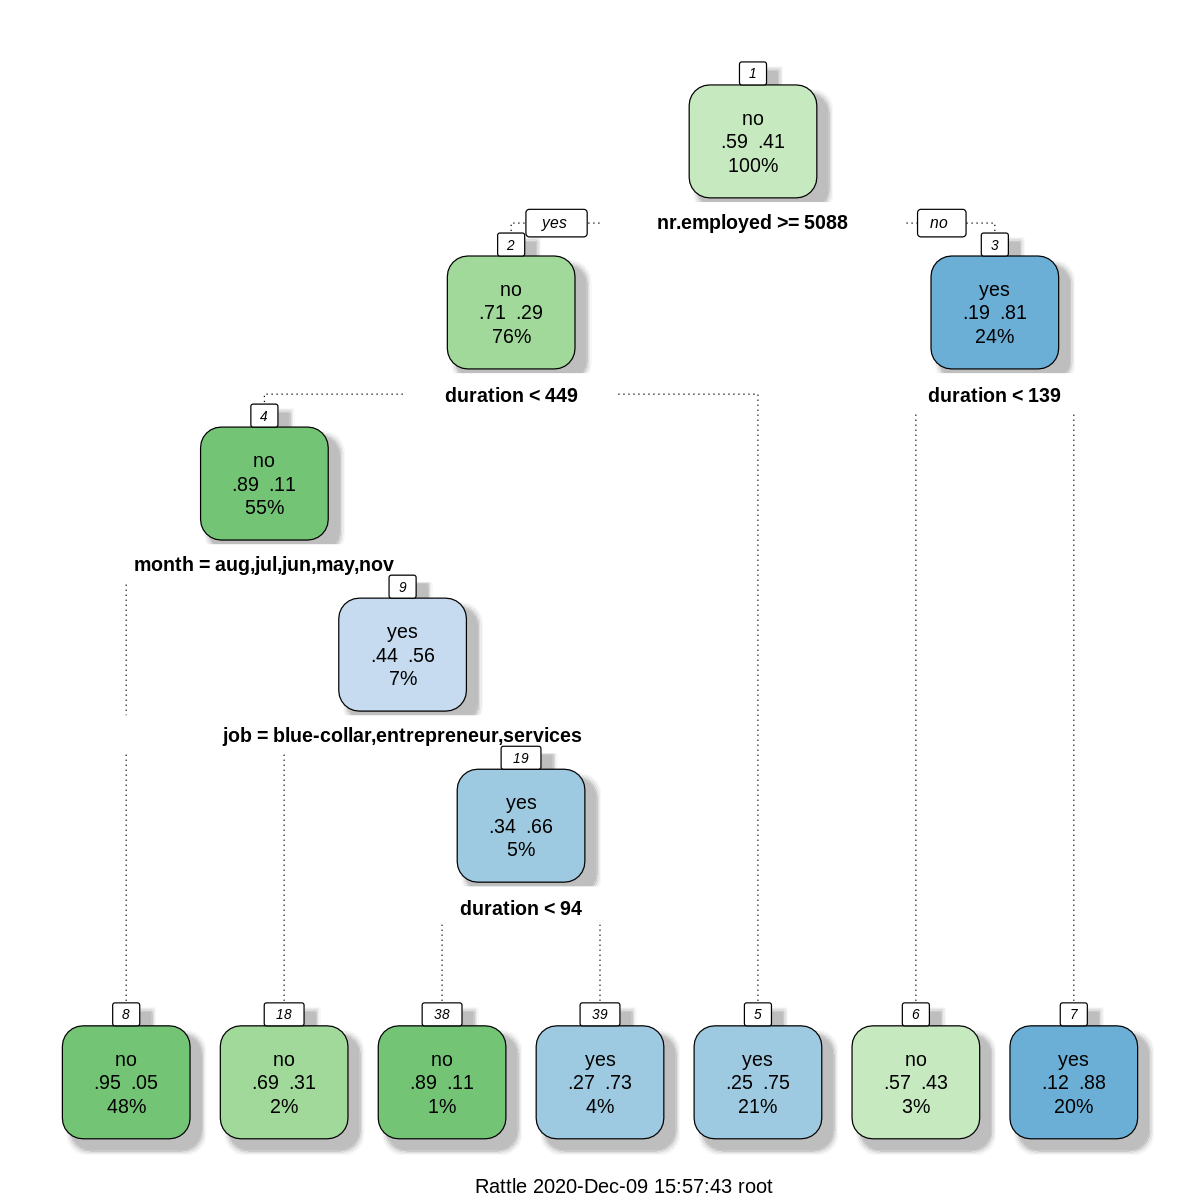

In [ ]:
termDeposit_detection_pr <- rpart::prune(termDeposit_detection, cp=min_xerror_cp)

fancyRpartPlot(termDeposit_detection_pr) #가지치기를 한 모델




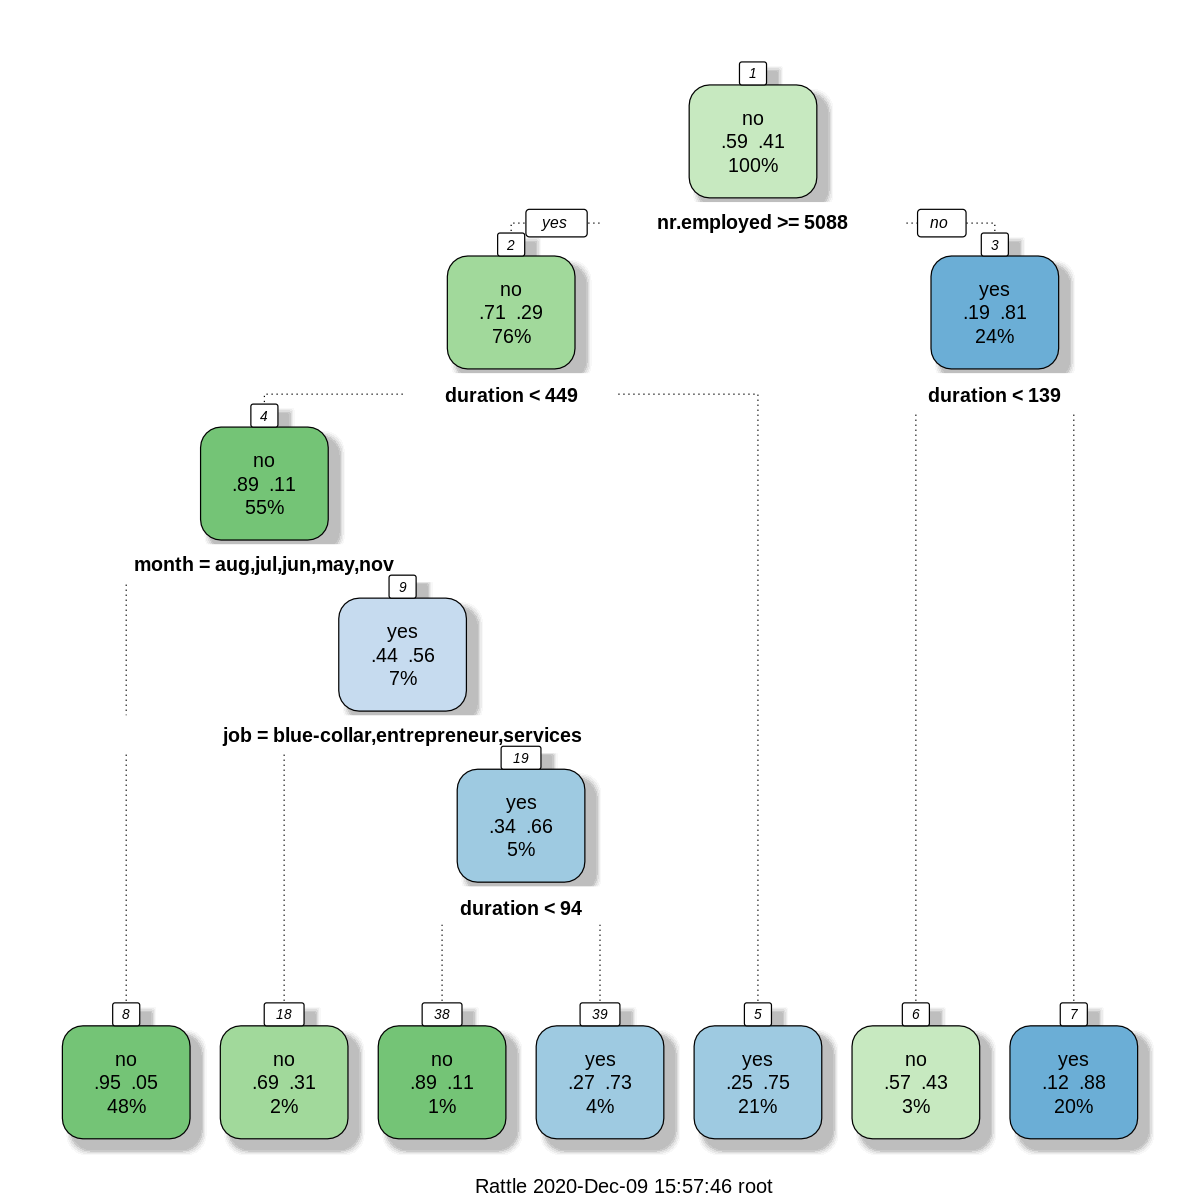

In [ ]:
fancyRpartPlot(termDeposit_detection) #가지치기를 안한 이전 모델

**test를 이용한 예측 및 평가**

In [ ]:
test %>% show()


# A tibble: 3,028 x 22
   ID      age job   marital education default housing loan  contact month
   <chr> <int> <fct> <fct>   <fct>     <fct>   <fct>   <fct> <fct>   <fct>
 1 T10      41 mana… married universi… no      yes     no    teleph… may  
 2 T11      46 blue… married professi… no      no      no    cellul… nov  
 3 T14      41 mana… married high.sch… unknown yes     no    cellul… may  
 4 T16      33 mana… married universi… no      no      no    teleph… aug  
 5 T19      57 tech… married high.sch… no      yes     no    cellul… may  
 6 T20      28 blue… single  universi… no      no      no    cellul… apr  
 7 T26      26 unem… single  universi… no      yes     no    cellul… apr  
 8 T27      52 admi… divorc… universi… no      no      no    cellul… nov  
 9 T37      28 blue… single  basic.6y  unknown yes     no    teleph… may  
10 T42      33 admi… married high.sch… unknown yes     no    teleph… may  
# … with 3,018 more rows, and 12 more variables: day_of_week <fct>,
#   durat

In [ ]:
#예측 predict(모델, 데이터, 분류타입)
DT_predict_value <- predict(termDeposit_detection_pr, DTtest, type="class")%>%
tibble(DT_predict_value =.)
DT_predict_value %>% show()

# A tibble: 3,028 x 1
   DT_predict_value
   <fct>           
 1 no              
 2 no              
 3 no              
 4 no              
 5 yes             
 6 no              
 7 yes             
 8 no              
 9 no              
10 yes             
# … with 3,018 more rows


In [ ]:
#실제 정답과 확인
DT_predict_check <- DTtest %>% select(termDeposit) %>% dplyr::bind_cols(.,DT_predict_value)
DT_predict_check%>%show()

# A tibble: 3,028 x 2
   termDeposit DT_predict_value
   <fct>       <fct>           
 1 no          no              
 2 no          no              
 3 no          no              
 4 yes         no              
 5 no          yes             
 6 no          no              
 7 yes         yes             
 8 yes         no              
 9 no          no              
10 yes         yes             
# … with 3,018 more rows


**confusion Matrix로 확인**

In [ ]:
#confusion Matrix로 실제값과 모델을 통해 분류한 값을 비교하는 Matrix
#첫 번째 인자는 예측한 값 # 두 번째 인자는 실제 값
cm <- caret:: confusionMatrix(DT_predict_value$DT_predict_value, DTtest$termDeposit)
cm

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1485  133
       yes  291 1119
                                          
               Accuracy : 0.86            
                 95% CI : (0.8471, 0.8721)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7166          
                                          
 Mcnemar's Test P-Value : 2.448e-14       
                                          
            Sensitivity : 0.8361          
            Specificity : 0.8938          
         Pos Pred Value : 0.9178          
         Neg Pred Value : 0.7936          
             Prevalence : 0.5865          
         Detection Rate : 0.4904          
   Detection Prevalence : 0.5343          
      Balanced Accuracy : 0.8650          
                                          
       'Positive' Class : no              
                        

In [ ]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

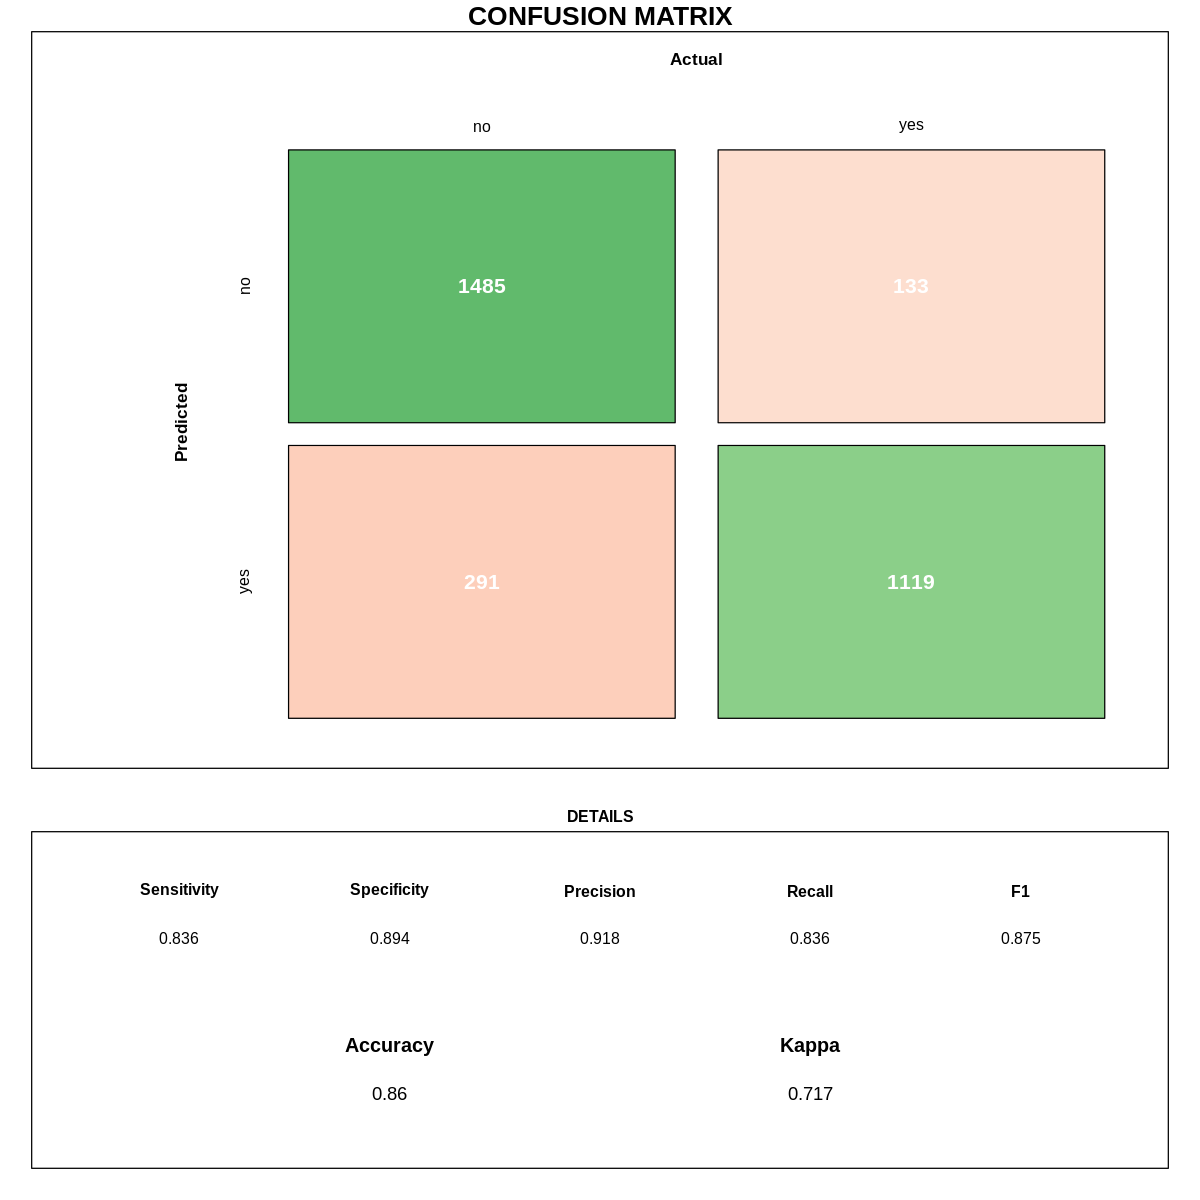

In [ ]:
draw_confusion_matrix(cm)

**배깅(Bagging)-중복을 허용하는 샘플링**

In [ ]:
library(ipred)
#set.seed(66)
termDeposit_bagging <- ipred::bagging(termDeposit ~ ., data= DTtrain, nbagg=100)

ERROR: ignored

In [ ]:
DT_predict_value <- predict(termDeposit_bagging, DTtest, type ="class") %>%
tibble(DT_predict_value = . )
DT_predict_value <- DTtest %>% select(termDeposit) %>% dplyr::bind_cols(.,DT_predict_value)

In [ ]:
DTcm <- caret::confusionMatrix(DT_predict_value$DT_predict_value, DTtest$termDeposit)
draw_confusion_matrix(DTcm)

#가지치기를 한 모델은 Accuracy=0.852 배깅을 한 모델은 0.869로 성능이 1.7%올랐다.

ERROR: ignored

**모델링한 데이터를 적용하기 위해 Test.csv를 불러온다.**

In [ ]:
DT_kaggle <- fread("/content/Test.csv", sep =",") %>% as_tibble()
DT_kaggle %>% summary() 

      ID                 age            job              marital         
 Length:1121        Min.   :18.00   Length:1121        Length:1121       
 Class :character   1st Qu.:32.00   Class :character   Class :character  
 Mode  :character   Median :38.00   Mode  :character   Mode  :character  
                    Mean   :40.48                                        
                    3rd Qu.:48.00                                        
                    Max.   :98.00                                        
  education           default            housing              loan          
 Length:1121        Length:1121        Length:1121        Length:1121       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

**범주형으로 바꿀수 있는 것들은 바꿔준다.**

In [ ]:
DT_kaggle <- DT_kaggle  %>%  mutate_at(c("job", "marital", "education", "default", "housing", "loan", "contact",
"month","day_of_week","poutcome"), `.funs` = as.factor)
DT_kaggle %>% str()

tibble [1,121 × 21] (S3: tbl_df/tbl/data.frame)
 $ ID            : chr [1:1121] "T1" "T2" "T3" "T4" ...
 $ age           : int [1:1121] 35 36 38 33 36 50 29 35 28 45 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 2 10 1 1 10 2 1 10 12 ...
 $ marital       : Factor w/ 3 levels "divorced","married",..: 2 2 1 2 2 2 2 2 3 2 ...
 $ education     : Factor w/ 7 levels "basic.4y","basic.6y",..: 1 7 4 4 2 3 3 4 5 7 ...
 $ default       : Factor w/ 2 levels "no","unknown": 1 1 1 1 1 1 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 3 3 1 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 3 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 1 2 1 1 1 1 2 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 1 1 2 8 8 7 7 2 5 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 3 1 1 1 1 1 5 4 3 1 ...
 $ duration      : int [1:1121] 646 231 320 207 183 705 1101 236 7

**Test데이터를 예측한다.**

In [ ]:
DT_predict_value <- predict(termDeposit_bagging, DT_kaggle, type ="class") %>%
tibble(termDeposit = . )
submission_bagging <- DT_kaggle %>% select(ID) %>% dplyr::bind_cols(.,DT_predict_value)

ERROR: ignored

In [ ]:
submission_bagging %>% head(20) #상위 20개를 확인한다.

ID,termDeposit
<chr>,<fct>
T1,no
T2,yes
T3,no
T4,yes
T5,no
T6,no
T7,yes
T8,no
T9,no


**Decision Trees for bagging submission**

In [ ]:
submission_bagging %>% write_csv(path = "20165132_bagging_submission.csv") #write_csv로 저장한다.

## 3. **Random Forest**
 - 샘플과 설명변수를 무작위로 선택함으로써 트리의 다양성을 확보한다.

In [ ]:
#install.packages("randomForest") #radmomForest를 설치하고 r에 불러온다.
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
RF_DF <- read_csv("/content/Train.csv") #fread를 통해서 준비된 train데이터를 불러온다.
str(RF_DF)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  emp.var.rate = col_double(),
  cons.price.idx = col_double(),
  cons.conf.idx = col_double(),
  euribor3m = col_double(),
  nr.employed = col_double()
)
ℹ Use `spec()` for the full column specifications.




tibble [10,098 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID            : chr [1:10098] "T1" "T2" "T3" "T4" ...
 $ age           : num [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : chr [1:10098] "technician" "retired" "technician" "management" ...
 $ marital       : chr [1:10098] "single" "single" "married" "married" ...
 $ education     : chr [1:10098] "university.degree" "high.school" "professional.course" "university.degree" ...
 $ default       : chr [1:10098] "no" "no" "unknown" "no" ...
 $ housing       : chr [1:10098] "no" "no" "yes" "no" ...
 $ loan          : chr [1:10098] "no" "no" "no" "no" ...
 $ contact       : chr [1:10098] "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr [1:10098] "nov" "jun" "jul" "nov" ...
 $ day_of_week   : chr [1:10098] "fri" "fri" "wed" "mon" ...
 $ duration      : num [1:10098] 903 74 75 59 252 ...
 $ campaign      : num [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ pdays         : num [1:10098] 999 999 999 999 

In [ ]:
RF_DF <- RF_DF %>% mutate_at(c("job", "marital", "education", "default", "housing", "loan", "contact",
"month","day_of_week","poutcome","termDeposit"), `.funs` = as.factor)
RF_DF %>% str()

tibble [10,098 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID            : chr [1:10098] "T1" "T2" "T3" "T4" ...
 $ age           : num [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 10 6 10 5 2 6 10 3 3 5 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 3 3 2 2 2 2 2 2 2 2 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 7 4 6 7 1 8 6 7 7 7 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 1 2 1 2 1 2 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 3 1 3 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 1 1 2 2 2 1 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 8 5 4 8 7 6 5 8 1 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 2 2 2 2 2 3 5 ...
 $ duration      : num [1:10098] 903 74 75 59 252

**랜덤 포레스트**

In [ ]:
#install.pakages("randomForest")
#library(randomForest)

#summary(RFtrain) #RandomForest에서 NA는 포함되면 안되기때문에 확인해서 impute를 통해서 데이터를 추가하거나
#na.omit을 이용해서 날려야 한다.

In [ ]:
#랜덤 포레스트를 사용 할 떄는 결측치(NA)가 없어야 한다.
#na.action파라메터에 na.omit을 넣어서 결측치를 삭제 해준다. 
#importance= 설명변수의 중요도를 파악할 수 있는 파라미터
#mtry = 7, ntree = 1000 하이퍼 파라미터로 랜덤포레스트의 성능을 조절하는 파라미터 
#mtry는 트리가 만들어질 때 몇개의 설명변수를 고를지에 대한 파라미터 >7개를 무작위로 선택해서 모델을 만들 것임 
#ntree 100개의 dt가 생성될것임 

termDeposit_RF <- randomForest(termDeposit ~ . , data = RF_DF,importance = T, mtry = 7, ntree = 1000)
termDeposit_RF


Call:
 randomForest(formula = termDeposit ~ ., data = RF_DF, importance = T,      mtry = 7, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 7

        OOB estimate of  error rate: 11.61%
Confusion matrix:
      no  yes class.error
no  5102  820  0.13846673
yes  352 3824  0.08429119

* 성능향상을 위한 mtry 골드 스탠다드(gold standard)=기준점 : sqrt(설명변수 개수) 설정

In [ ]:
#mtry의 기준점을 설정한다. 항상 맞는 것은 아니다.
#select를 통해서 모델에서 사용안하는 반응변수 termDeposit을 제외하고, 개수를 조사하고 길이를 구한다.
mtry_sqrt <- RF_DF %>% select(-termDeposit) %>% colnames() %>%
 length() %>% sqrt() %>% floor()

mtry_sqrt

[1] 4

 * mtry의 골든 스탠다드를 넣어서 값을 구한다.

In [ ]:
model <- randomForest(termDeposit ~ . , data = RF_DF,importance = T, mtry = mtry_sqrt, ntree = 1000)
model


Call:
 randomForest(formula = termDeposit ~ ., data = RF_DF, importance = T,      mtry = mtry_sqrt, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 11.8%
Confusion matrix:
      no  yes class.error
no  5079  843   0.1423506
yes  349 3827   0.0835728

**예측 및 평가**

In [ ]:
library(caret) 
#set.seed(31)
index <- createDataPartition(y = RF_DF$termDeposit, p = 0.7, list = FALSE) 
RFtrain <- RF_DF[index, ] #7
RFtest <- RF_DF[-index, ] #3

#RFtest

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Warning message:
“The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [ ]:
RF_predict_value <- predict(model, RFtest, type = "class") %>% 
tibble(RF_predict_value = .)
RF_predict_check <- RFtest %>% select(ID) %>% dplyr::bind_cols(., RF_predict_value) 
#predict를 이용해서 train 데이터의 평가를 진행한다.

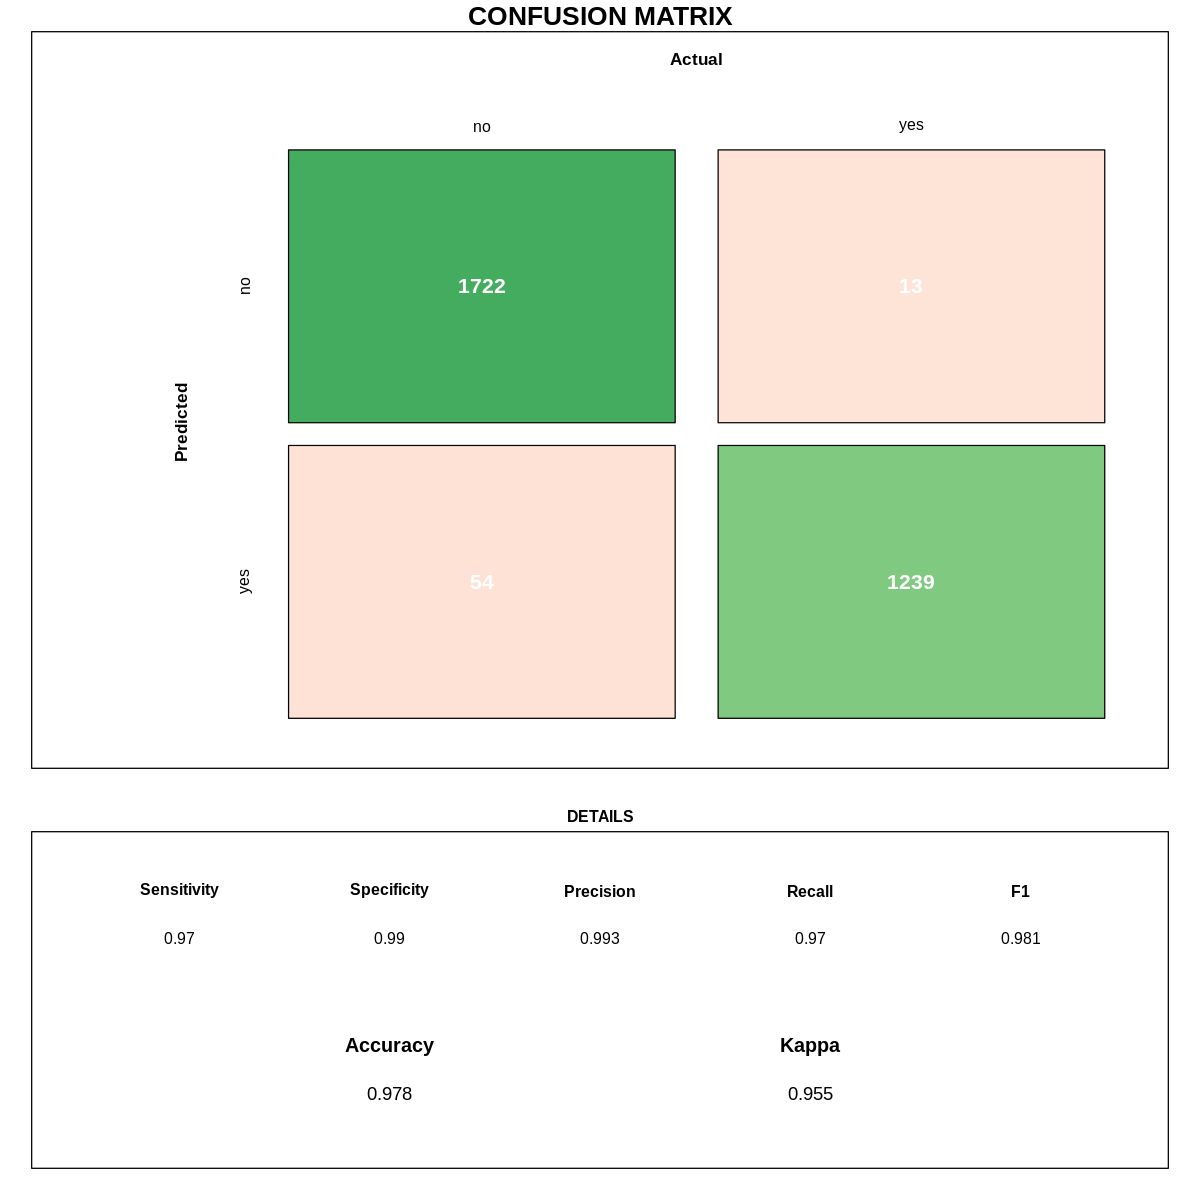

In [ ]:
RFcm <- caret::confusionMatrix(RF_predict_value$RF_predict_value, RFtest$termDeposit)
draw_confusion_matrix(RFcm)
#draw_confusion_matrix을 이용해서 성능을 확인한다.

**- 최적의 파라미터를 구하기위한 gridsearch 진행**

In [ ]:
trControl <- trainControl(method = "cv", number = 10, search = "grid")

In [ ]:
# Run the model
rf_default <- train(termDeposit~., data = RF_DF, method = "rf", metric = "Accuracy", trControl = trControl)
# Print the results
print(rf_default)

**Search best mtry**

In [ ]:
tuneGrid <- expand.grid(.mtry = c(2: 6)) # 변수개수 7개. 
rf_mtry <- train(termDeposit~.,
    data = RF_DF, method = "rf",
    metric = "Accuracy", tuneGrid = tuneGrid,
    trControl = trControl, importance = T, ntree = 1000)
print(rf_mtry)

In [ ]:
best_mtry <- rf_mtry$bestTune$mtry
best_mtry

In [ ]:
tuneGrid <- expand.grid(.mtry = best_mtry)
store_maxtrees <- list()
for (ntree in c(250, 300, 350, 400, 450, 500, 550, 600, 800, 1000, 2000)) {
    set.seed(51)
    rf_maxtrees <- RFtrain(termDeposit~.,
        data = RF_DF,
        method = "rf",
        metric = "Accuracy",
        tuneGrid = tuneGrid,
        trControl = trControl,
        importance = T,
        ntree = ntree)
    key <- toString(ntree)
    store_maxtrees[[key]] <- rf_maxtrees
}
results_tree <- resamples(store_maxtrees)
summary(results_tree)

**Best parameter**
* mtry = 
* ntree = 

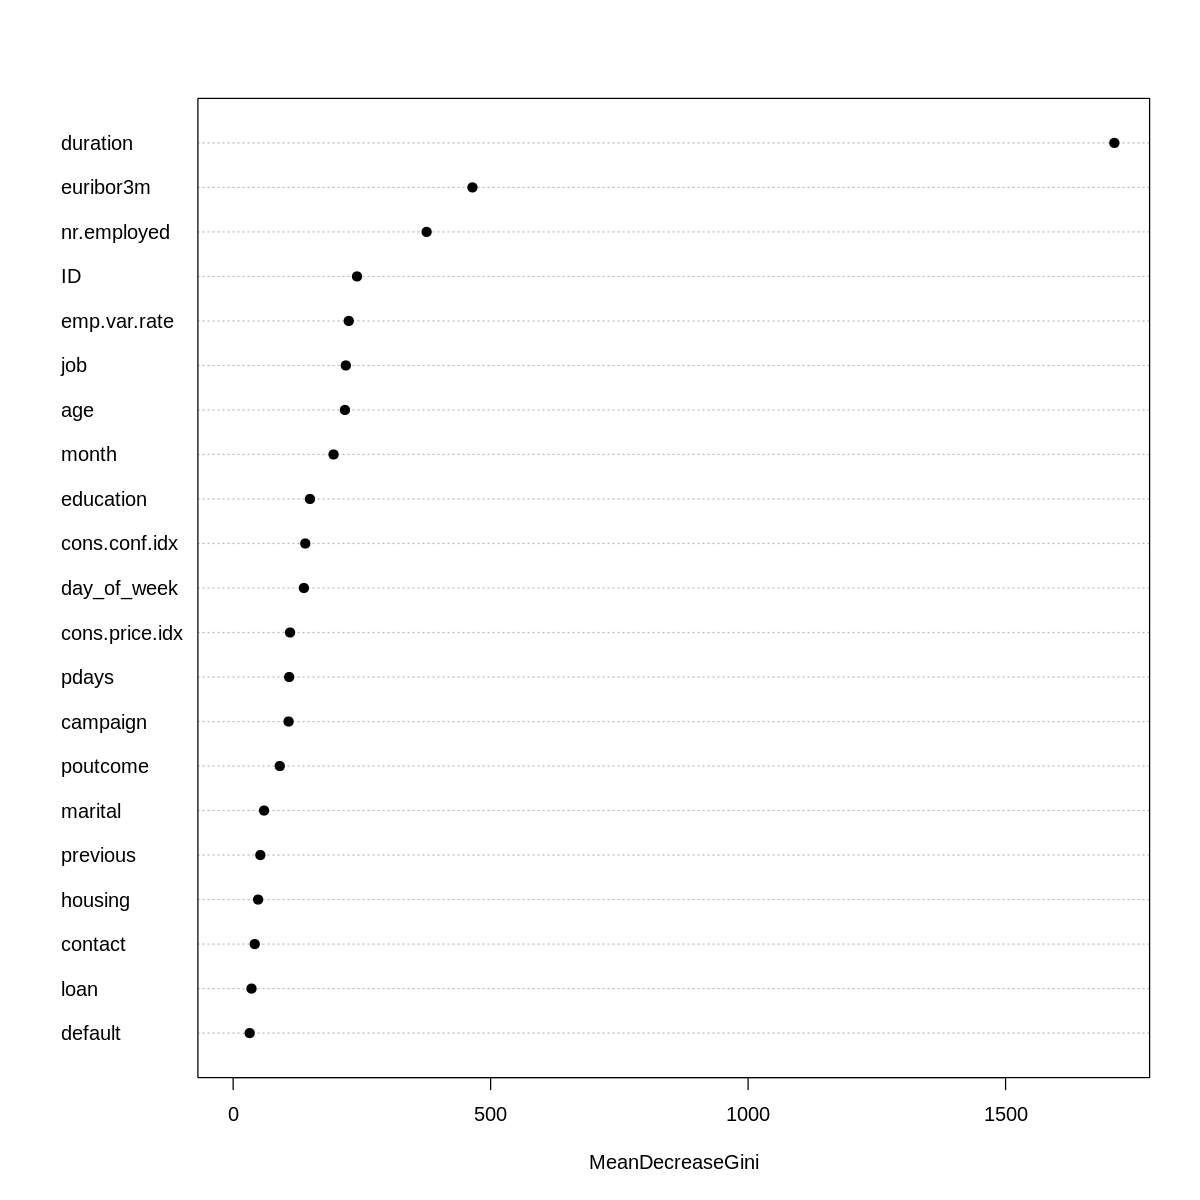

In [ ]:
varImpPlot(model, type =2 ,pch=19 , col =1 ,cex= 1, main="")

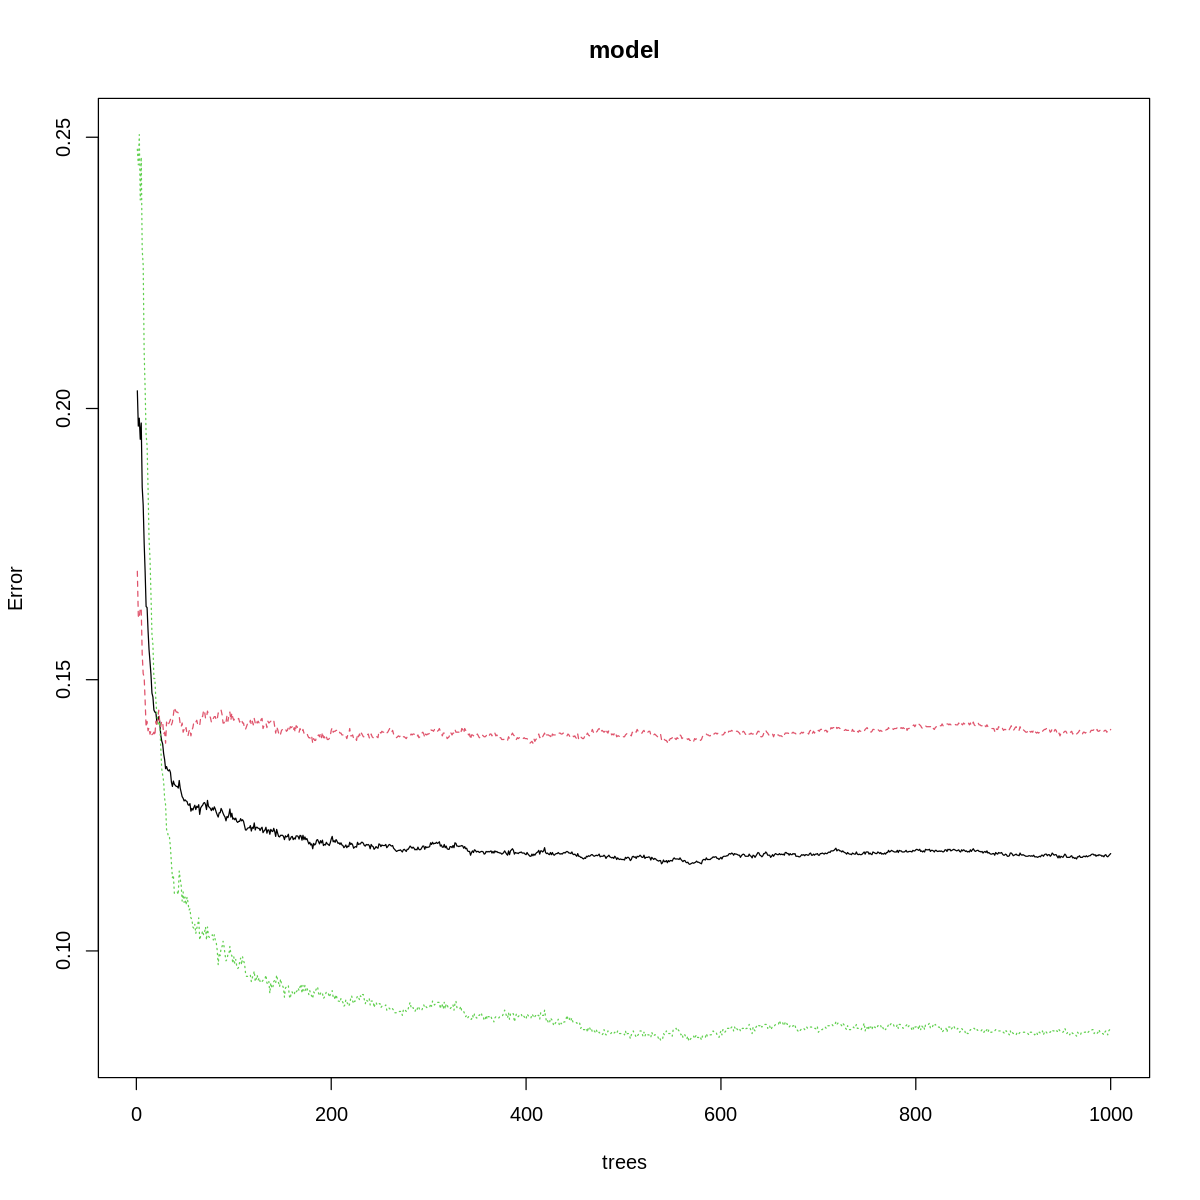

In [ ]:
plot(model)
legend(x=750 , y = 0.34, c("no","yes","mean"), col= c("pink","green","black"), pch =c(1,1,1),cex = 1.3)

**Kaggle에 제출할 Test데이터를 불러온다.**

In [ ]:
RF_kaggle <- read_csv("/content/Test.csv")
RF_kaggle %>% summary()


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  emp.var.rate = col_double(),
  cons.price.idx = col_double(),
  cons.conf.idx = col_double(),
  euribor3m = col_double(),
  nr.employed = col_double()
)
ℹ Use `spec()` for the full column specifications.




      ID                 age            job              marital         
 Length:1121        Min.   :18.00   Length:1121        Length:1121       
 Class :character   1st Qu.:32.00   Class :character   Class :character  
 Mode  :character   Median :38.00   Mode  :character   Mode  :character  
                    Mean   :40.48                                        
                    3rd Qu.:48.00                                        
                    Max.   :98.00                                        
  education           default            housing              loan          
 Length:1121        Length:1121        Length:1121        Length:1121       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

In [ ]:
RF_kaggle <- RF_kaggle %>% mutate_at(c("job", "marital", "education", "default", "housing", "loan", "contact",
"month","day_of_week","poutcome"), `.funs` = as.factor)
RF_kaggle %>% str()

tibble [1,121 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID            : chr [1:1121] "T1" "T2" "T3" "T4" ...
 $ age           : num [1:1121] 35 36 38 33 36 50 29 35 28 45 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 2 10 1 1 10 2 1 10 12 ...
 $ marital       : Factor w/ 3 levels "divorced","married",..: 2 2 1 2 2 2 2 2 3 2 ...
 $ education     : Factor w/ 7 levels "basic.4y","basic.6y",..: 1 7 4 4 2 3 3 4 5 7 ...
 $ default       : Factor w/ 2 levels "no","unknown": 1 1 1 1 1 1 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 3 3 1 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 3 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 1 2 1 1 1 1 2 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 1 1 2 8 8 7 7 2 5 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 3 1 1 1 1 1 5 4 3 1 ...
 $ duration      : num [1:1121] 646 231 320 207 183 ..

-Test데이터 예측

In [ ]:
common <- intersect(names(RF_DF), names(RF_kaggle)) 
for (p in common) { 
  if (class(RF_DF[[p]]) == "factor") { 
    levels(RF_kaggle[[p]]) <- levels(RF_DF[[p]]) 
  } 
}

ERROR: ignored

In [ ]:
RF_predict_value <- predict(model, RF_kaggle, type = "class") %>% tibble(termDeposit = .)
submission_RF <- RF_kaggle %>% select(ID) %>% dplyr::bind_cols(., RF_predict_value) 
#predict를 이용해서 train 데이터의 평가를 진행한다.



In [ ]:
submission_RF %>% head(20) #제출할 RF 상위20개를 확인한다.

ID,termDeposit
<chr>,<fct>
T1,no
T2,no
T3,yes
T4,yes
T5,no
T6,yes
T7,yes
T8,no
T9,no


In [ ]:
submission_RF %>% write_csv(path ="20165132_RF_submission.csv")

# Support vector machine(SVM)

In [ ]:
SVM_DF <- read_csv("/content/Train.csv")
str(SVM_DF)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  emp.var.rate = col_double(),
  cons.price.idx = col_double(),
  cons.conf.idx = col_double(),
  euribor3m = col_double(),
  nr.employed = col_double()
)
ℹ Use `spec()` for the full column specifications.




tibble [10,098 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID            : chr [1:10098] "T1" "T2" "T3" "T4" ...
 $ age           : num [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : chr [1:10098] "technician" "retired" "technician" "management" ...
 $ marital       : chr [1:10098] "single" "single" "married" "married" ...
 $ education     : chr [1:10098] "university.degree" "high.school" "professional.course" "university.degree" ...
 $ default       : chr [1:10098] "no" "no" "unknown" "no" ...
 $ housing       : chr [1:10098] "no" "no" "yes" "no" ...
 $ loan          : chr [1:10098] "no" "no" "no" "no" ...
 $ contact       : chr [1:10098] "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr [1:10098] "nov" "jun" "jul" "nov" ...
 $ day_of_week   : chr [1:10098] "fri" "fri" "wed" "mon" ...
 $ duration      : num [1:10098] 903 74 75 59 252 ...
 $ campaign      : num [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ pdays         : num [1:10098] 999 999 999 999 

In [ ]:
SVM_DF <- SVM_DF %>%select(-ID)%>% mutate_at(c("job", "marital", "education", "default", "housing", "loan", "contact",
"month","day_of_week","poutcome","termDeposit"), `.funs` = as.factor)
SVM_DF %>% str()

tibble [10,098 × 21] (S3: tbl_df/tbl/data.frame)
 $ age           : num [1:10098] 41 57 34 54 49 73 40 34 56 41 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 10 6 10 5 2 6 10 3 3 5 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 3 3 2 2 2 2 2 2 2 2 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 7 4 6 7 1 8 6 7 7 7 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 1 2 1 2 1 2 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 3 1 3 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 1 1 2 2 2 1 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 8 5 4 8 7 6 5 8 1 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 2 2 2 2 2 3 5 ...
 $ duration      : num [1:10098] 903 74 75 59 252 ...
 $ campaign      : num [1:10098] 3 3 5 1 1 1 1 2 1 7 ...
 $ pday

In [ ]:
#마찬가지로 train과test로 나눠준다.
library(caret)
index <- createDataPartition(y = SVM_DF$termDeposit, p = 0.7, list = FALSE) 
SVMtrain <- SVM_DF[index, ] #70%
SVMtest <- SVM_DF[-index, ] #30%

Warning message:
“The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


-gamma와 cost값을 어떻게 주는지에 따라 성능이 달라진다.
>값이 커질수록 모델에 대한 복잡도가 증가한다.

In [ ]:
#rbf > radial , type> C-classfication(분류)
library(e1071)
svm_termDeposit <- svm(formula =termDeposit ~., data =SVMtrain, type ="C-classification", kernel = "radial")
summary(svm_termDeposit)


Call:
svm(formula = termDeposit ~ ., data = SVMtrain, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2580

 ( 1275 1305 )


Number of Classes:  2 

Levels: 
 no yes




In [ ]:
#rbf parameter / cost와 gamma는 임의값을 우선 넣어준다.
svm_termDeposit2 <- svm(formula =termDeposit ~ .,data =SVMtrain, type="C-classification", kernel ="radial",
                          cost =1000, gamma=0.1 )
summary(svm_termDeposit2) #support 갯수가 적어졌다.



Call:
svm(formula = termDeposit ~ ., data = SVMtrain, type = "C-classification", 
    kernel = "radial", cost = 1000, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1000 

Number of Support Vectors:  2488

 ( 1092 1396 )


Number of Classes:  2 

Levels: 
 no yes




-test를 이용한 예측 및 평가

In [ ]:
SVMtest %>% show()

# A tibble: 3,028 x 21
     age job   marital education default housing loan  contact month day_of_week
   <dbl> <fct> <fct>   <fct>     <fct>   <fct>   <fct> <fct>   <fct> <fct>      
 1    54 mana… married universi… no      no      no    cellul… nov   mon        
 2    73 reti… married unknown   no      yes     no    teleph… mar   mon        
 3    40 tech… married professi… unknown no      no    teleph… jun   mon        
 4    34 entr… married universi… unknown yes     no    cellul… nov   mon        
 5    46 blue… married professi… no      no      no    cellul… nov   fri        
 6    41 mana… married high.sch… unknown yes     no    cellul… may   tue        
 7    55 tech… married universi… no      yes     yes   cellul… may   thu        
 8    26 mana… single  universi… no      no      no    cellul… may   thu        
 9    28 blue… single  universi… no      no      no    cellul… apr   tue        
10    46 tech… married professi… unknown no      no    cellul… aug   thu        
# … w

-gamma와 cost를 디폴트 값으로 한 모델

In [ ]:
predict_value <- predict(svm_termDeposit, SVMtest) %>% tibble(predict_value = .)
predict_check <- SVMtest %>% select(termDeposit) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 3,028 x 2
   termDeposit predict_value
   <fct>       <fct>        
 1 no          no           
 2 yes         yes          
 3 no          no           
 4 yes         yes          
 5 no          yes          
 6 no          no           
 7 yes         yes          
 8 yes         yes          
 9 yes         no           
10 no          no           
# … with 3,018 more rows


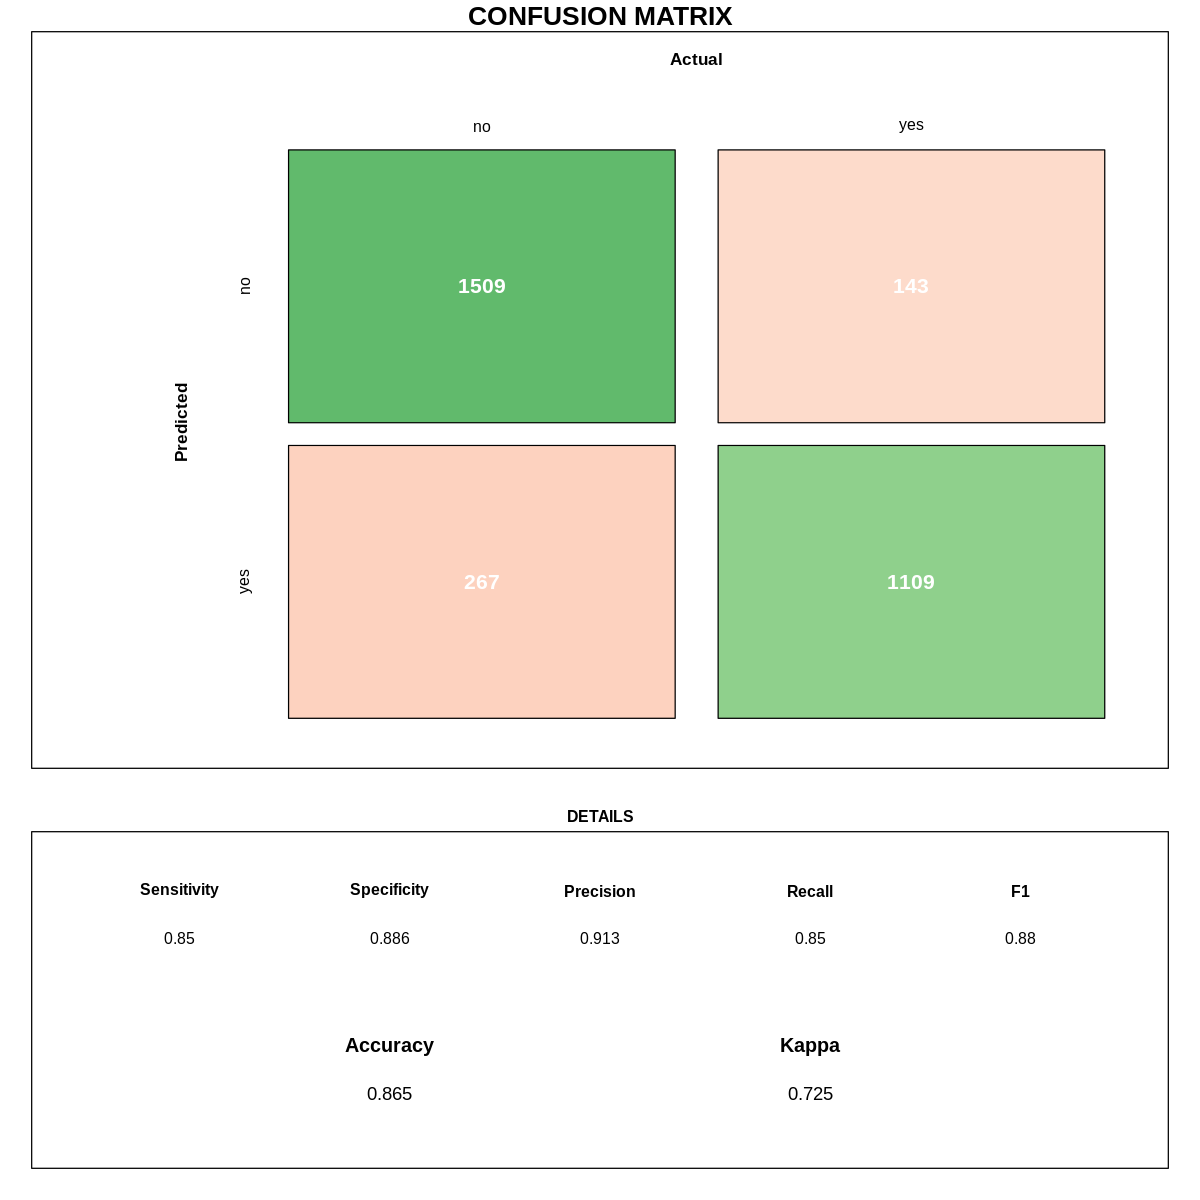

In [ ]:
cm <- caret::confusionMatrix(predict_value$predict_value, SVMtest$termDeposit)
draw_confusion_matrix(cm)

-gamma와 cost를 임의의 값으로 한 모델

In [ ]:
#실제train모델의 정답과 예측한 값을 확인한다.
predict_value <- predict(svm_termDeposit2, SVMtest) %>% 
 tibble(predict_value = .)
predict_check <- SVMtest %>% select(termDeposit) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 3,028 x 2
   termDeposit predict_value
   <fct>       <fct>        
 1 no          no           
 2 yes         no           
 3 no          no           
 4 yes         yes          
 5 no          yes          
 6 no          no           
 7 yes         no           
 8 yes         yes          
 9 yes         yes          
10 no          no           
# … with 3,018 more rows


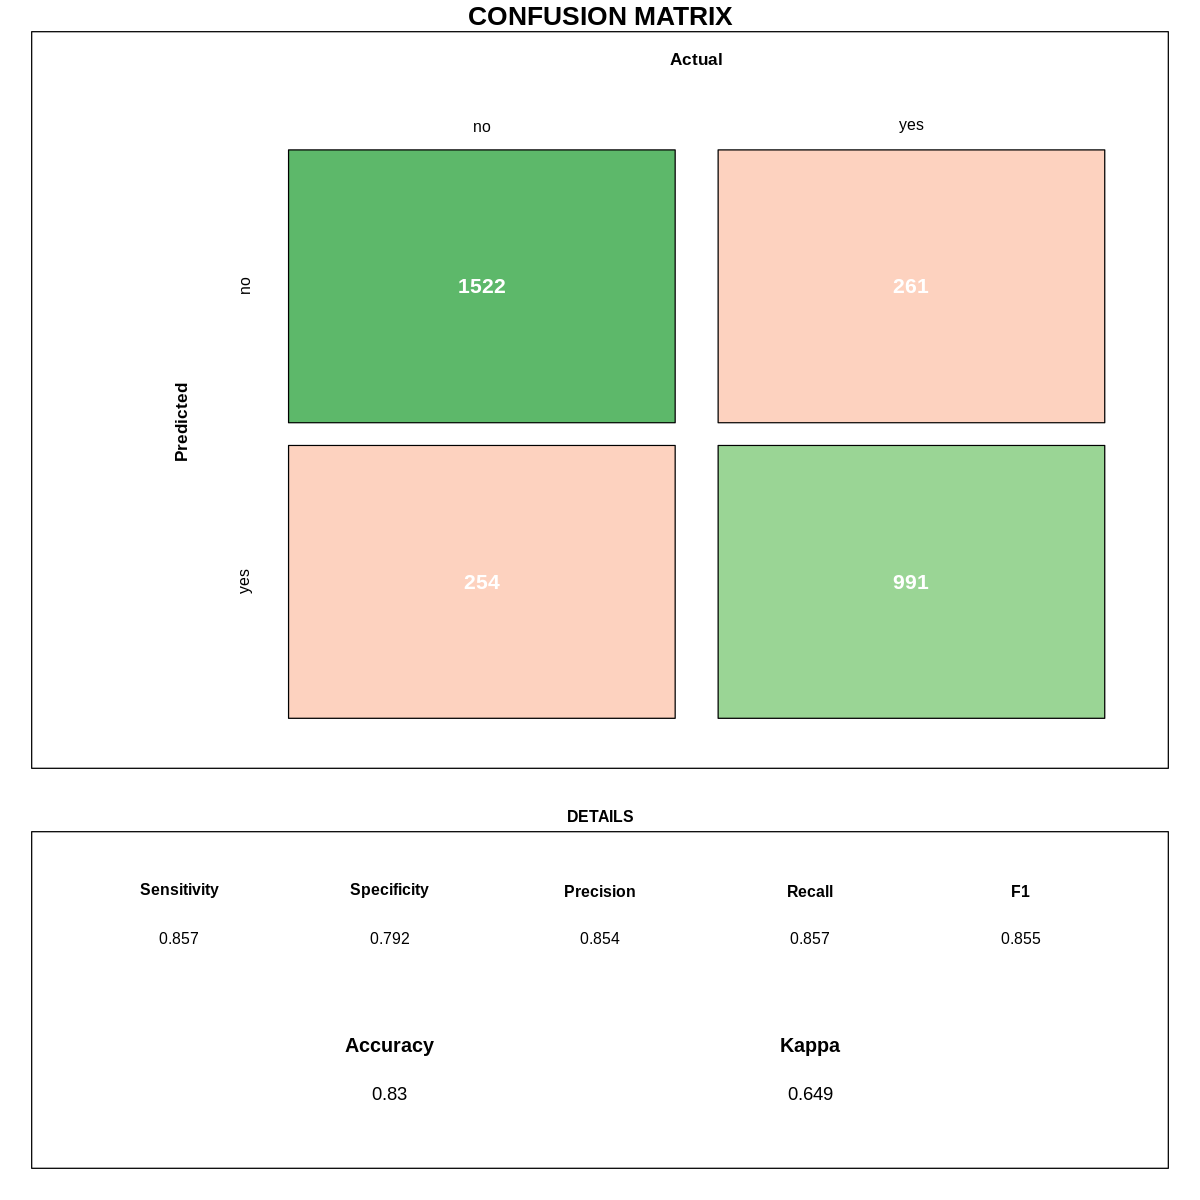

In [ ]:
cm <- caret::confusionMatrix(predict_value$predict_value, SVMtest$termDeposit)
draw_confusion_matrix(cm)
#gamma와 cost를 변경한 모델의 성능이 더 낮다.

**gamma와 cost를 tune()으로 최적의 수치를 찾는다.**

In [ ]:
#범위를 지정을 해준다.
#gamma=10^-8 ~ 10^1  >10개 ,cost = 1~30 / train의 모든 파라미터 조합를 계산해서 gridsearch가 실행된다 >300개중 최적의 조합을 찾는다.
#10-fold cross validation을 진행하기 때문에 실행할 때마다 best가 변경될수 있음
set.seed(51) #best값이 계속 변경되지 않도록 시드값을 준다.
tuned <- tune.svm(termDeposit ~ ., data =SVMtrain, gamma =10^(-8:1), cost =1 :30)

In [ ]:
tune_summary <- summary(tuned)
tune_summary


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1    1

- best performance: 0.1318246 

- Detailed performance results:
    gamma cost     error  dispersion
1   1e-08    1 0.4135785 0.014396617
2   1e-07    1 0.4135785 0.014396617
3   1e-06    1 0.4135785 0.014396617
4   1e-05    1 0.4135785 0.014396617
5   1e-04    1 0.2038190 0.013865715
6   1e-03    1 0.1527581 0.010090021
7   1e-02    1 0.1357850 0.013648387
8   1e-01    1 0.1318246 0.010870558
9   1e+00    1 0.1599717 0.012623757
10  1e+01    1 0.4093352 0.013355335
11  1e-08    2 0.4135785 0.014396617
12  1e-07    2 0.4135785 0.014396617
13  1e-06    2 0.4135785 0.014396617
14  1e-05    2 0.3967468 0.015061417
15  1e-04    2 0.1826025 0.013292773
16  1e-03    2 0.1471004 0.011663665
17  1e-02    2 0.1357850 0.013451525
18  1e-01    2 0.1338048 0.010734747
19  1e+00    2 0.1646393 0.010672444
20  1e+01    2 0.4089109 0.014400477
21  1e-08    3 0.4135785 0.014396617
22 

In [ ]:
#최적의 파라미터를 찾는다.
best_parameter <- tune_summary$best.parameters
best_parameter
# best_parameter[1,1] == gamma >0.1 / best_parameter[1,2] == cost >1

ERROR: ignored

In [ ]:
svm_termDeposit_tune <- svm(termDeposit ~ ., data = SVMtrain, type = "C-classification", kernel = "radial",
 gamma = best_parameter[1,1], cost = best_parameter[1,2])

ERROR: ignored

In [ ]:
summary(svm_termDeposit_tune)


Call:
svm(formula = termDeposit ~ ., data = SVMtrain, type = "C-classification", 
    kernel = "radial", gamma = best_parameter[1, 1], cost = best_parameter[1, 
        2])


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2711

 ( 1224 1487 )


Number of Classes:  2 

Levels: 
 no yes




In [ ]:
#train에서 만든 모델과 실제 train의 정답과 확인한다.
predict_value <- predict(svm_termDeposit_tune, SVMtest) %>% 
 tibble(predict_value = .)
predict_check <- SVMtest %>% select(termDeposit) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 3,028 x 2
   termDeposit predict_value
   <fct>       <fct>        
 1 no          no           
 2 yes         yes          
 3 no          no           
 4 yes         yes          
 5 no          yes          
 6 no          no           
 7 no          no           
 8 yes         yes          
 9 yes         yes          
10 yes         no           
# … with 3,018 more rows


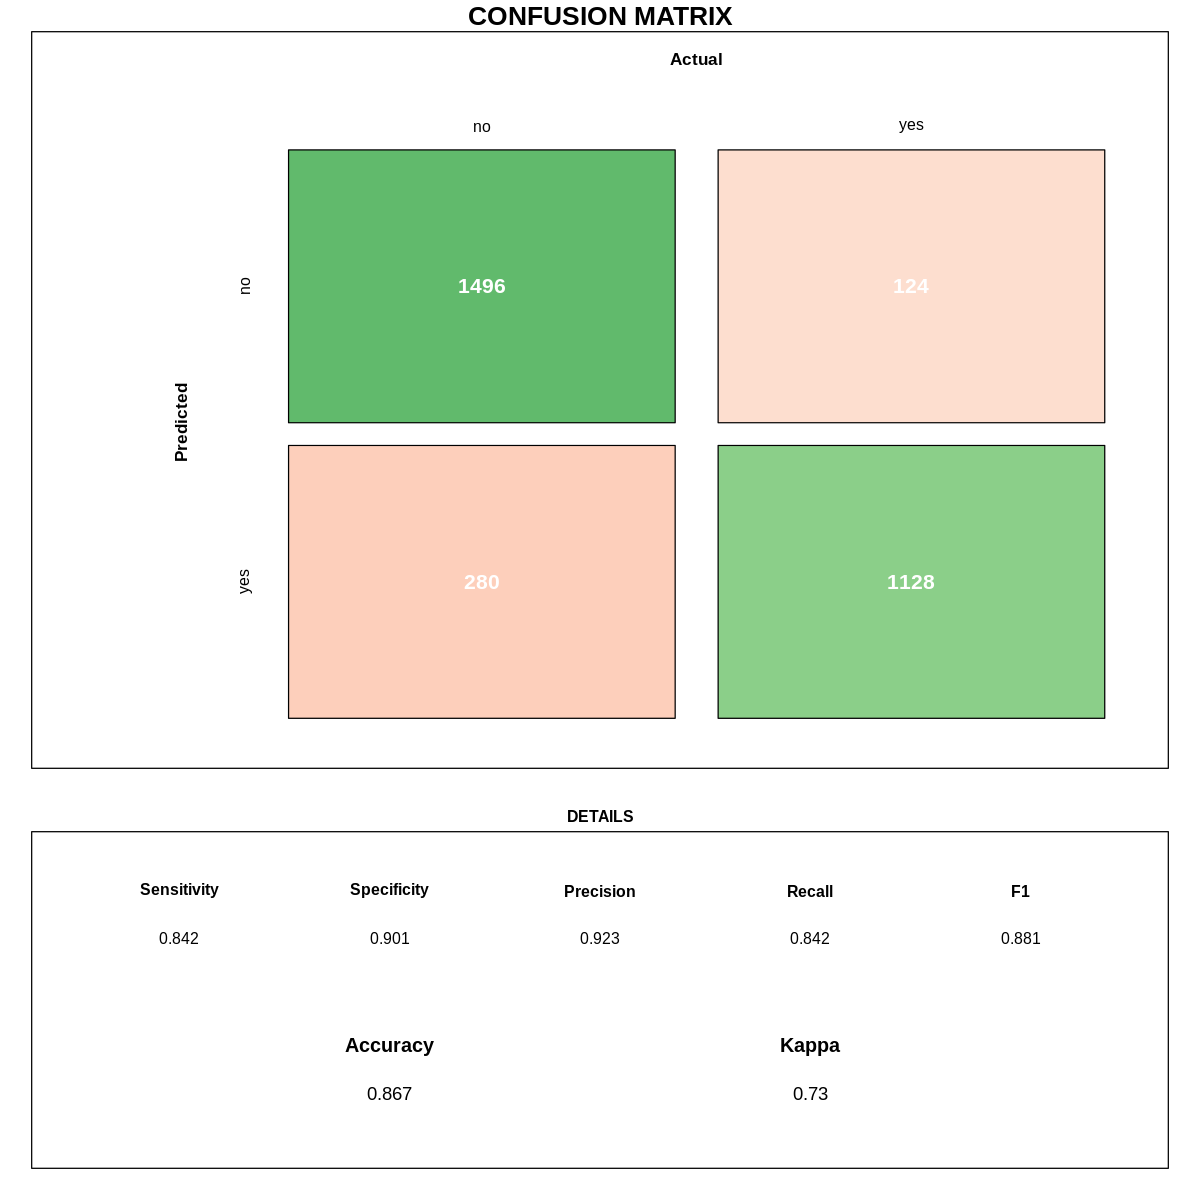

In [ ]:
#성능을 cm모델로 확인
cm <- caret::confusionMatrix(predict_value$predict_value, SVMtest$termDeposit)
draw_confusion_matrix(cm)

-linear kenel

In [ ]:
#linear 커널사용 시 감마사용X 
tuned_l <- tune.svm(termDeposit ~ ., data = SVMtrain, cost = 8^(-10:1), kernel = "linear")
tune_summary_l <- summary(tuned_l)
tune_summary_l


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    8

- best performance: 0.1342291 

- Detailed performance results:
           cost     error  dispersion
1  9.313226e-10 0.4135785 0.010939862
2  7.450581e-09 0.4135785 0.010939862
3  5.960464e-08 0.4135785 0.010939862
4  4.768372e-07 0.4135785 0.010939862
5  3.814697e-06 0.4135785 0.010939862
6  3.051758e-05 0.4135785 0.010939862
7  2.441406e-04 0.1973126 0.015031870
8  1.953125e-03 0.1534653 0.010610823
9  1.562500e-02 0.1357850 0.010626523
10 1.250000e-01 0.1347949 0.009935729
11 1.000000e+00 0.1349364 0.009597745
12 8.000000e+00 0.1342291 0.010252835


In [ ]:
best_parameter <- tune_summary$best.parameters
best_parameter # best_parameter[1,1] == gamma 0.1 / best_parameter[1,2] == cost 1

,gamma,cost
,<dbl>,<int>
8,0.1,1


In [ ]:
best_parameter_l <- tune_summary_l$best.parameters
best_parameter_l # best_parameter[1,1] == cost 8

,cost
,<dbl>
12,8


-모델생성.

-best_parameter를 구해서 변수로 넣어주었지만, tune을 구할 때 시간이 너무 오래걸려서 런타임이 끊겼습니다. 다시 돌리면 똑같이 오래 기다려야 돼서 그래서 그냥 나온 best_parameter를 그대로 사용했습니다.

In [ ]:
library(e1071)
svm_tune <- svm(termDeposit ~ ., data = SVMtrain, type = "C-classification", kernel = "radial",
 gamma = 0.1, cost =1)

In [ ]:
svm_linear <- svm(termDeposit ~ ., data = SVMtrain, type = "C-classification", kernel = "linear",
 cost = 8)

**Test.csv의 데이터를 train으로 학습한 2개의 모델을 이용해서 kaggle에 제출**

In [ ]:
SVM_kaggle <- read_csv("/content/Test.csv")
SVM_kaggle %>% summary()


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  emp.var.rate = col_double(),
  cons.price.idx = col_double(),
  cons.conf.idx = col_double(),
  euribor3m = col_double(),
  nr.employed = col_double()
)
ℹ Use `spec()` for the full column specifications.




      ID                 age            job              marital         
 Length:1121        Min.   :18.00   Length:1121        Length:1121       
 Class :character   1st Qu.:32.00   Class :character   Class :character  
 Mode  :character   Median :38.00   Mode  :character   Mode  :character  
                    Mean   :40.48                                        
                    3rd Qu.:48.00                                        
                    Max.   :98.00                                        
  education           default            housing              loan          
 Length:1121        Length:1121        Length:1121        Length:1121       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

In [ ]:
SVM_kaggle <- SVM_kaggle %>% mutate_at(c("job", "marital", "education", "default", "housing", "loan", "contact",
"month","day_of_week","poutcome"), `.funs` = as.factor)
SVM_kaggle %>% str()

tibble [1,121 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID            : chr [1:1121] "T1" "T2" "T3" "T4" ...
 $ age           : num [1:1121] 35 36 38 33 36 50 29 35 28 45 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 2 10 1 1 10 2 1 10 12 ...
 $ marital       : Factor w/ 3 levels "divorced","married",..: 2 2 1 2 2 2 2 2 3 2 ...
 $ education     : Factor w/ 7 levels "basic.4y","basic.6y",..: 1 7 4 4 2 3 3 4 5 7 ...
 $ default       : Factor w/ 2 levels "no","unknown": 1 1 1 1 1 1 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 3 3 1 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 3 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 1 2 1 1 1 1 2 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 1 1 2 8 8 7 7 2 5 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 3 1 1 1 1 1 5 4 3 1 ...
 $ duration      : num [1:1121] 646 231 320 207 183 ..

* 예측(model_grid 모델, model_linear)

- facktor level을 맞춰준다.

In [ ]:
common <- intersect(names(SVM_DF), names(SVM_kaggle)) 
for (p in common) { 
  if (class(SVM_DF[[p]]) == "factor") { 
    levels(SVM_kaggle[[p]]) <- levels(SVM_DF[[p]]) 
  } 
}

In [ ]:
# model tune을 csv형태로 저장한다.
predict_value <- predict(svm_tune, SVM_kaggle) %>% tibble(termDeposit = .)
submission1 <- SVM_kaggle %>% select(ID) %>% dplyr::bind_cols(., predict_value) %>% 
 write_csv(path = "20165132_SVM-tune_submission.csv")

 # model linear을 csv형태로 저장한다.
predict_value <- predict(svm_linear, SVM_kaggle) %>% tibble(termDeposit = .)
submission1 <- SVM_kaggle %>% select(ID) %>% dplyr::bind_cols(., predict_value) %>%
  write_csv(path = "20165132_SVM-linear_submission.csv")

Warning message:
“The `path` argument of `write_csv()` is deprecated as of readr 1.4.0.
Please use the `file` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
